In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
%matplotlib inline
from scipy import stats

In [3]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")
    

# Import and initial review of the datasets

In [4]:
filename = config['data']['raw']['raw_1']
df_demo = pd.read_csv(filename)

filename = config['data']['raw']['raw_2']
df_exp_clients = pd.read_csv(filename)

filename = config['data']['raw']['raw_3']
df_pt1 = pd.read_csv(filename)


filename = config['data']['raw']['raw_4']
df_pt2 = pd.read_csv(filename)

In [5]:
df_data = pd.concat([df_pt1, df_pt2]).reset_index()

In [6]:
#df_exp_clients = df_exp_clients.dropna()

# Combining Datasets

In [7]:
df_clients = pd.merge(df_exp_clients, df_demo, on='client_id', how='inner')
df_clients.sort_values(by=['client_id']).reset_index()

index  client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  \
0      58722        169       NaN            21.0             262.0      47.5   
1      14753        555      Test             3.0              46.0      29.5   
2      28357        647      Test            12.0             151.0      57.5   
3      50544        722       NaN            11.0             143.0      59.5   
4      12828        934      Test             9.0             109.0      51.0   
...      ...        ...       ...             ...               ...       ...   
70604  37325    9999400      Test             7.0              86.0      28.5   
70605  39046    9999626      Test             9.0             113.0      35.0   
70606  21972    9999729      Test            10.0             124.0      31.0   
70607   2317    9999832      Test            23.0             281.0      49.0   
70608  56450    9999839       NaN            13.0             160.0      28.5   

      gendr  num_accts        bal  calls_6_mnth  logons_6_mnth  
0         M        2.0  501570.72           4.0            4.0  
1         U        2.0   25454.66           2.0            6.0  
2         M        2.0   30525.80           0.0            4.0  
3         F        2.0   22466.17           1.0            1.0  
4         F        2.0   32522.88           0.0            3.0  
...     ...        ...        ...           ...            ...  
70604     U        2.0   51787.04           0.0            3.0  
70605     M        2.0   36642.88           6.0            9.0  
70606     F        3.0  107059.74           6.0            9.0  
70607     F        2.0  431887.61           1.0            4.0  
70608     F        2.0   67425.35           3.0            3.0  

[70609 rows x 11 columns]

In [8]:
df_data_all = pd.merge(df_clients, df_data, on='client_id', how='outer')
df_data_all['Variation'] = df_data_all['Variation'].fillna('Random')

## Test Group

In [9]:
df_data_test = df_data_all[df_data_all['Variation'] == 'Test'].reset_index(drop=True)
df_data_test

client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0             555      Test             3.0              46.0      29.5     U   
1             555      Test             3.0              46.0      29.5     U   
2             555      Test             3.0              46.0      29.5     U   
3             555      Test             3.0              46.0      29.5     U   
4             555      Test             3.0              46.0      29.5     U   
...           ...       ...             ...               ...       ...   ...   
177842    9999729      Test            10.0             124.0      31.0     F   
177843    9999729      Test            10.0             124.0      31.0     F   
177844    9999729      Test            10.0             124.0      31.0     F   
177845    9999832      Test            23.0             281.0      49.0     F   
177846    9999832      Test            23.0             281.0      49.0     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth   index  \
0             2.0   25454.66           2.0            6.0   72014   
1             2.0   25454.66           2.0            6.0   72015   
2             2.0   25454.66           2.0            6.0   72016   
3             2.0   25454.66           2.0            6.0   72017   
4             2.0   25454.66           2.0            6.0   72018   
...           ...        ...           ...            ...     ...   
177842        3.0  107059.74           6.0            9.0  128597   
177843        3.0  107059.74           6.0            9.0  128598   
177844        3.0  107059.74           6.0            9.0  128599   
177845        2.0  431887.61           1.0            4.0   13657   
177846        2.0  431887.61           1.0            4.0   13658   

                   visitor_id                      visit_id process_step  \
0       402506806_56087378777  637149525_38041617439_716659      confirm   
1       402506806_56087378777  637149525_38041617439_716659       step_3   
2       402506806_56087378777  637149525_38041617439_716659       step_2   
3       402506806_56087378777  637149525_38041617439_716659       step_1   
4       402506806_56087378777  637149525_38041617439_716659        start   
...                       ...                           ...          ...   
177842  834634258_21862004160  870243567_56915814033_814203       step_2   
177843  834634258_21862004160  870243567_56915814033_814203       step_1   
177844  834634258_21862004160  870243567_56915814033_814203        start   
177845  145538019_54444341400  472154369_16714624241_585315       step_1   
177846  145538019_54444341400  472154369_16714624241_585315        start   

                  date_time  
0       2017-04-15 13:00:34  
1       2017-04-15 13:00:14  
2       2017-04-15 12:58:35  
3       2017-04-15 12:58:03  
4       2017-04-15 12:57:56  
...                     ...  
177842  2017-05-08 16:08:40  
177843  2017-05-08 16:08:30  
177844  2017-05-08 16:08:25  
177845  2017-05-16 16:46:11  
177846  2017-05-16 16:46:03  

[177847 rows x 15 columns]

## Control Group

In [10]:
df_data_control = df_data_all[df_data_all['Variation'] == 'Control'].reset_index(drop=True)

## Random Group

In [11]:
df_data_random = df_data_all[df_data_all['Variation']== 'Random'].reset_index(drop=True)

In [12]:
visits_total = df_data_all['visit_id'].unique().shape[0]
visits_test = df_data_test['visit_id'].unique().shape[0]
visits_control = df_data_control['visit_id'].unique().shape[0]
visits_random = df_data_random['visit_id'].unique().shape[0]


print(f"Total number of visits logged into the process: {visits_total}")
print(f"Total number of visits logged into the test process: {visits_test}")
print(f"Total number of visits logged into the control process: {visits_control}")
print(f"Total number of visits logged in but with no group info: {visits_random}")
#print(f"Number of visitss with no group and demographic info: {df_data_all['visit_id'].unique().shape[0] - df_demo['visit_id'].unique().shape[0]}")
#print(f"Percentage of missing group info: {df_data_random['visit_id'].unique().shape[0] / df_data_all['visit_id'].unique().shape[0] * 100:.2f}%")
#print(f"Percentage of missing group and demographic info: {(df_data_all['visit_id'].unique().shape[0] - df_demo['visit_id'].unique().shape[0]) / df_data_all['visit_id'].unique().shape[0] * 100:.2f}%")

Total number of visits logged into the process: 158095
Total number of visits logged into the test process: 37136
Total number of visits logged into the control process: 32189
Total number of visits logged in but with no group info: 89252


# Restructuring Dataframes

In [13]:
# Convert date_time to datetime format
df_data_control['date_time'] = pd.to_datetime(df_data_control['date_time'])
df_data_test['date_time'] = pd.to_datetime(df_data_test['date_time'])
df_data_random['date_time'] = pd.to_datetime(df_data_random['date_time'])

In [14]:
def process_completed(df):
    # Check if each visit_id has reached the 'confirm' step
    completed_visits = df.groupby('visit_id')['process_step'].apply(lambda steps: 'confirm' in steps.values)
    return completed_visits

In [15]:
completed_test = process_completed(df_data_test)
completed_control = process_completed(df_data_control)
completed_random = process_completed(df_data_random)

In [16]:
df_completed_test = completed_test.reset_index().rename(columns={'process_step': 'completed'})
df_completed_control = completed_control.reset_index().rename(columns={'process_step': 'completed'})
df_completed_random = completed_random.reset_index().rename(columns={'process_step': 'completed'})

## Dataframes with all visits and completed column (True & False)

In [17]:
# Merge completion info back to the original dataframes
df_data_test = df_data_test.merge(df_completed_test, on='visit_id')
df_data_control = df_data_control.merge(df_completed_control, on='visit_id')
df_data_random = df_data_random.merge(df_completed_random, on='visit_id')

## Dataframes with fully completed visits (only True)

In [18]:
df_data_completed_test = df_data_test[df_data_test['completed'] == True]
df_data_completed_control = df_data_control[df_data_control['completed'] == True]
df_data_completed_random = df_data_random[df_data_random['completed'] == True]

## Dataframes with completed unique visits and completed column (True & False)

In [19]:
df_data_test_unique_visits = df_data_test.drop_duplicates(subset='visit_id')
df_data_control_unique_visits = df_data_control.drop_duplicates(subset='visit_id')
df_data_random_unique_visits = df_data_random.drop_duplicates(subset='visit_id')

## Completion & Step Time

In [20]:
def calculate_completion_time(visit):
    visit = visit.sort_values(by='date_time')
    confirm_row = visit[visit['process_step'] == 'confirm']
    start_row = visit[visit['process_step'] == 'start']
    step_1_row = visit[visit['process_step'] == 'step_1']
    step_2_row = visit[visit['process_step'] == 'step_2']
    step_3_row = visit[visit['process_step'] == 'step_3']

   # print(visit['visit_id'])
    if not start_row.empty and not confirm_row.empty and not step_1_row.empty and not step_2_row.empty and not step_3_row.empty:
        if (start_row['date_time'].iloc[-1] < confirm_row['date_time'].iloc[-1]):
            if (start_row['date_time'].iloc[-1] < step_1_row['date_time'].iloc[-1]) and (step_1_row['date_time'].iloc[-1] < step_2_row['date_time'].iloc[-1]):
                if (step_2_row['date_time'].iloc[-1] < step_3_row['date_time'].iloc[-1]) and (step_3_row['date_time'].iloc[-1] < confirm_row['date_time'].iloc[-1]):

                    completion_time = (confirm_row['date_time'].iloc[-1] - start_row['date_time'].iloc[-1]).total_seconds()
                    step_1_time = (step_1_row['date_time'].iloc[-1] - start_row['date_time'].iloc[-1]).total_seconds()
                    step_2_time = (step_2_row['date_time'].iloc[-1] - step_1_row['date_time'].iloc[-1]).total_seconds()
                    step_3_time = (step_3_row['date_time'].iloc[-1] - step_2_row['date_time'].iloc[-1]).total_seconds()
                    confirm_time = (confirm_row['date_time'].iloc[-1] - step_3_row['date_time'].iloc[-1]).total_seconds()
                    
                    data = {'Completion Time': [completion_time],
                            'Step 1 Time': [step_1_time],
                            'Step 2 Time': [step_2_time],
                            'Step 3 Time': [step_3_time],
                            'Confirm Time': [confirm_time]}
                    return pd.DataFrame(data)

    else:
        data = {'Completion Time': [pd.NaT],
                'Step 1 Time': [pd.NaT],
                'Step 2 Time': [pd.NaT],
                'Step 3 Time': [pd.NaT],
                'Confirm Time': [pd.NaT]}
        return pd.DataFrame(data)

In [21]:
# Calculate completion time
completion_time_test = df_data_completed_test.groupby('visit_id').apply(calculate_completion_time)#.reset_index()
completion_time_control = df_data_completed_control.groupby('visit_id').apply(calculate_completion_time)#.reset_index()
completion_time_random = df_data_completed_random.groupby('visit_id').apply(calculate_completion_time)#.reset_index()

C:\Users\salto\AppData\Local\Temp\ipykernel_16712\4030953223.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completion_time_test = df_data_completed_test.groupby('visit_id').apply(calculate_completion_time)#.reset_index()
C:\Users\salto\AppData\Local\Temp\ipykernel_16712\4030953223.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completion_time_control = df_data_completed_control.groupby('visit_id'

In [22]:
completion_time_test = completion_time_test.reset_index()
completion_time_test.drop('level_1', axis='columns', inplace=True)

completion_time_control = completion_time_control.reset_index()
completion_time_control.drop('level_1', axis='columns', inplace=True)

completion_time_random = completion_time_random.reset_index()
completion_time_random.drop('level_1', axis='columns', inplace=True)

#### Dataframes with uniques visit ids and calculated times per step

In [119]:
df_test_final = df_data_completed_test.drop_duplicates(subset='visit_id').merge(completion_time_test, on = 'visit_id')
df_control_final = df_data_completed_control.drop_duplicates(subset='visit_id').merge(completion_time_control, on = 'visit_id')
df_random_final = df_data_completed_random.drop_duplicates(subset='visit_id').merge(completion_time_random, on = 'visit_id')

In [120]:
df_all = pd.concat([df_control_final, df_random_final, df_test_final], axis=0, ignore_index=True)

In [174]:
df = df_all.copy()
df.dropna(inplace=True)
df

client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0           1195   Control            21.0             262.0      54.5     M   
1           1197   Control             7.0              85.0      28.5     U   
2           3743   Control             6.0              75.0      30.0     U   
3           5354   Control             4.0              58.0      50.5     U   
4           6642   Control            12.0             149.0      35.5     M   
...          ...       ...             ...               ...       ...   ...   
88097    9998773      Test             4.0              59.0      28.5     U   
88098    9998851      Test             4.0              58.0      23.5     U   
88100    9999009      Test            18.0             216.0      68.5     M   
88101    9999400      Test             7.0              86.0      28.5     U   
88102    9999729      Test            10.0             124.0      31.0     F   

       num_accts         bal  calls_6_mnth  logons_6_mnth  ...  \
0            2.0    28457.96           2.0            5.0  ...   
1            5.0   177062.14           5.0            8.0  ...   
2            3.0    48262.21           3.0            6.0  ...   
3            2.0    62282.38           2.0            5.0  ...   
4            2.0    34987.23           0.0            3.0  ...   
...          ...         ...           ...            ...  ...   
88097        2.0    76988.65           2.0            5.0  ...   
88098        2.0    38473.54           3.0            6.0  ...   
88100        3.0  2055381.29           6.0            9.0  ...   
88101        2.0    51787.04           0.0            3.0  ...   
88102        3.0   107059.74           6.0            9.0  ...   

                  visitor_id                      visit_id process_step  \
0      766842522_69992551638  393817425_39015278493_996341      confirm   
1      753759429_54481946928   71862471_21202285428_848395      confirm   
2      179439784_83920302761   438930656_9173628148_961548      confirm   
3      233679354_36495397627  192604721_14077630095_819213      confirm   
4        378857471_644475492  261034804_26267268728_251909      confirm   
...                      ...                           ...          ...   
88097   481169437_1308863478  980310183_14300639078_417437      confirm   
88098  660529049_81285947655  310744937_17135608286_213964      confirm   
88100  212849256_28644888524  149965839_24823291142_245569      confirm   
88101  915967319_19082377501  288904166_90826265353_276104      confirm   
88102  834634258_21862004160  870243567_56915814033_814203      confirm   

                date_time completed  Completion Time Step 1 Time Step 2 Time  \
0     2017-04-05 20:19:31      True            245.0        33.0        98.0   
1     2017-04-01 17:17:59      True             95.0         4.0        68.0   
2     2017-06-16 06:37:04      True            292.0        13.0        39.0   
3     2017-04-12 20:31:31      True             90.0        13.0         8.0   
4     2017-04-19 12:27:58      True            443.0        11.0        33.0   
...                   ...       ...              ...         ...         ...   
88097 2017-04-12 23:50:22      True            295.0        11.0        23.0   
88098 2017-04-05 12:08:43      True            165.0         7.0        26.0   
88100 2017-03-31 07:20:36      True            171.0         8.0        26.0   
88101 2017-04-20 05:23:27      True            119.0        22.0        27.0   
88102 2017-05-08 16:09:40      True             75.0         5.0        10.0   

      Step 3 Time Confirm Time  
0            31.0         83.0  
1             6.0         17.0  
2           141.0         99.0  
3            17.0         52.0  
4            84.0        315.0  
...           ...          ...  
88097       125.0        136.0  
88098       101.0         31.0  
88100        19.0        118.0  
88101        46.0         24.0  
88102        39.0         21

In [175]:
# Convert columns to numeric
df['Completion Time'] = pd.to_numeric(df['Completion Time'], errors='coerce')
df['Step 1 Time'] = pd.to_numeric(df['Step 1 Time'], errors='coerce')
df['Step 2 Time'] = pd.to_numeric(df['Step 2 Time'], errors='coerce')
df['Step 3 Time'] = pd.to_numeric(df['Step 3 Time'], errors='coerce')
df['Confirm Time'] = pd.to_numeric(df['Confirm Time'], errors='coerce')
df['clnt_tenure_yr'] = pd.to_numeric(df['clnt_tenure_yr'], errors='coerce')
df['clnt_tenure_mnth'] = pd.to_numeric(df['clnt_tenure_mnth'], errors='coerce')
df['clnt_age'] = pd.to_numeric(df['clnt_age'], errors='coerce')
df['num_accts'] = pd.to_numeric(df['num_accts'], errors='coerce')
df['bal'] = pd.to_numeric(df['bal'], errors='coerce')
df['calls_6_mnth'] = pd.to_numeric(df['calls_6_mnth'], errors='coerce')
df['logons_6_mnth'] = pd.to_numeric(df['logons_6_mnth'], errors='coerce')

In [176]:
df

client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0           1195   Control            21.0             262.0      54.5     M   
1           1197   Control             7.0              85.0      28.5     U   
2           3743   Control             6.0              75.0      30.0     U   
3           5354   Control             4.0              58.0      50.5     U   
4           6642   Control            12.0             149.0      35.5     M   
...          ...       ...             ...               ...       ...   ...   
88097    9998773      Test             4.0              59.0      28.5     U   
88098    9998851      Test             4.0              58.0      23.5     U   
88100    9999009      Test            18.0             216.0      68.5     M   
88101    9999400      Test             7.0              86.0      28.5     U   
88102    9999729      Test            10.0             124.0      31.0     F   

       num_accts         bal  calls_6_mnth  logons_6_mnth  ...  \
0            2.0    28457.96           2.0            5.0  ...   
1            5.0   177062.14           5.0            8.0  ...   
2            3.0    48262.21           3.0            6.0  ...   
3            2.0    62282.38           2.0            5.0  ...   
4            2.0    34987.23           0.0            3.0  ...   
...          ...         ...           ...            ...  ...   
88097        2.0    76988.65           2.0            5.0  ...   
88098        2.0    38473.54           3.0            6.0  ...   
88100        3.0  2055381.29           6.0            9.0  ...   
88101        2.0    51787.04           0.0            3.0  ...   
88102        3.0   107059.74           6.0            9.0  ...   

                  visitor_id                      visit_id process_step  \
0      766842522_69992551638  393817425_39015278493_996341      confirm   
1      753759429_54481946928   71862471_21202285428_848395      confirm   
2      179439784_83920302761   438930656_9173628148_961548      confirm   
3      233679354_36495397627  192604721_14077630095_819213      confirm   
4        378857471_644475492  261034804_26267268728_251909      confirm   
...                      ...                           ...          ...   
88097   481169437_1308863478  980310183_14300639078_417437      confirm   
88098  660529049_81285947655  310744937_17135608286_213964      confirm   
88100  212849256_28644888524  149965839_24823291142_245569      confirm   
88101  915967319_19082377501  288904166_90826265353_276104      confirm   
88102  834634258_21862004160  870243567_56915814033_814203      confirm   

                date_time completed  Completion Time  Step 1 Time  \
0     2017-04-05 20:19:31      True            245.0         33.0   
1     2017-04-01 17:17:59      True             95.0          4.0   
2     2017-06-16 06:37:04      True            292.0         13.0   
3     2017-04-12 20:31:31      True             90.0         13.0   
4     2017-04-19 12:27:58      True            443.0         11.0   
...                   ...       ...              ...          ...   
88097 2017-04-12 23:50:22      True            295.0         11.0   
88098 2017-04-05 12:08:43      True            165.0          7.0   
88100 2017-03-31 07:20:36      True            171.0          8.0   
88101 2017-04-20 05:23:27      True            119.0         22.0   
88102 2017-05-08 16:09:40      True             75.0          5.0   

       Step 2 Time  Step 3 Time  Confirm Time  
0             98.0         31.0          83.0  
1             68.0          6.0          17.0  
2             39.0        141.0          99.0  
3              8.0         17.0          52.0  
4             33.0         84.0         315.0  
...            ...          ...           ...  
88097         23.0        125.0         136.0  
88098         26.0        101.0          31.0  
88100         26.0         19.0         118.0  
88101         27.0         46.0          24

### Completion Time

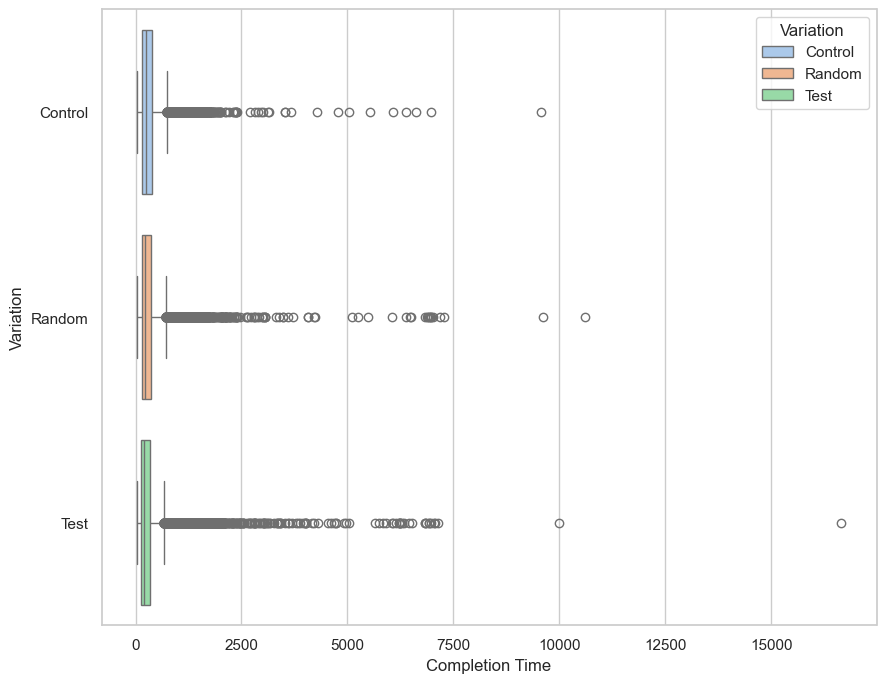

In [177]:
plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='Completion Time', y='Variation', hue='Variation', palette = 'pastel', legend = True)
plt.show()

In [178]:
# median completion time
#test = df_test_final.drop_duplicates(subset='visit_id')
mean = df.groupby('Variation')['Completion Time'].mean()
mean

Variation
Control    327.543520
Random     326.745844
Test       321.201156
Name: Completion Time, dtype: float64

#### Remove outliers

In [248]:
def tukeys_test_outliers(data, repl_type,k=1):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    sigma = data.std()
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    from scipy.stats import median_abs_deviation
    mad_score = median_abs_deviation(data)
    print(mad_score)
    
    # Replace or discard outliers
    if repl_type == 'median':
        data = pd.Series(np.where(np.logical_or(data < lower_bound, data > upper_bound), median_val, data), index=data.index)
    elif repl_type == 'Tukey':
        data = pd.Series(np.where(data < lower_bound, lower_bound, np.where(data > upper_bound, upper_bound, data)), index=data.index)
    elif repl_type == 'Nat_IQR':
        data = pd.Series(np.where(np.logical_or(data < k*lower_bound, data > k*upper_bound), np.nan, data), index=data.index)
    elif repl_type == 'Nat_sigma':
        data = pd.Series(np.where(np.logical_or(data < -3*sigma, data > 3*sigma), np.nan, data), index=data.index)
    elif repl_type == 'Nat_mad':
        data = pd.Series(np.where(np.logical_or(data < -4*mad_score, data > 4*mad_score), np.nan, data), index=data.index)
        
    
    return data

In [254]:
# Apply the outlier removal function to each group with different k
def apply_outlier_removal(group):
    k_values = {'Control': 1, 'Random': 1, 'Test': 1}  # Define k values for each group
    
    # Get the k value for the current group
    k = k_values.get(group['Variation'].iloc[0], 1)  
    
    # Apply outlier removal function with the selected k value
    group['Completion Time'] = tukeys_test_outliers(group['Completion Time'], repl_type='Nat_sigma', k=k)
    return group

# Apply the outlier removal function to each group
df_outliers = df.groupby('Variation').apply(apply_outlier_removal).reset_index(drop=True)

102.0
95.0
89.0


C:\Users\salto\AppData\Local\Temp\ipykernel_16712\1933479217.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_outliers = df.groupby('Variation').apply(apply_outlier_removal).reset_index(drop=True)


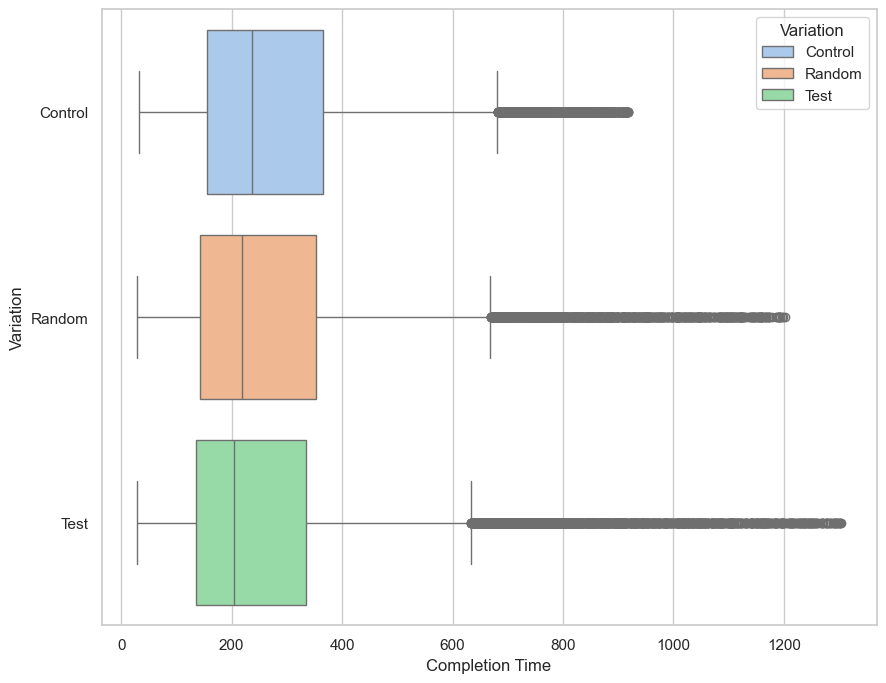

In [255]:
plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_outliers, x='Completion Time', y='Variation', hue='Variation', palette = 'pastel', legend = True)
#plt.savefig('../images/outliers_applied_tukey.png')
plt.show()

In [256]:
df_outliers.dropna(inplace=True)
mean_outliers_filtered = df_outliers.groupby('Variation')['Completion Time'].mean()
mean_outliers_filtered

Variation
Control    287.149922
Random     286.721608
Test       275.675680
Name: Completion Time, dtype: float64

#### T-test for samples with and without outliers

In [257]:
control = df[df['Variation'] == 'Control']['Completion Time']
random = df[df['Variation'] == 'Random']['Completion Time']
test = df[df['Variation'] == 'Test']['Completion Time']

control_outliers = df_outliers[df_outliers['Variation'] == 'Control']['Completion Time']
random_outliers = df_outliers[df_outliers['Variation'] == 'Random']['Completion Time']
test_outliers = df_outliers[df_outliers['Variation'] == 'Test']['Completion Time']

In [258]:
# Two-Sample t-Test
print(stats.ttest_ind(control,control_outliers))
print(stats.ttest_ind(random,random_outliers))
print(stats.ttest_ind(test,test_outliers))

TtestResult(statistic=13.301008850243726, pvalue=3.042306307367797e-40, df=27470.0)
TtestResult(statistic=9.794790679808177, pvalue=1.30256774685829e-22, df=24861.0)
TtestResult(statistic=12.293641734286222, pvalue=1.1579306643318176e-34, df=34557.0)


In [259]:
# Kolmogorov-Smirnov Test (K-S Test)
print(stats.ks_2samp(control,control_outliers))
print(stats.ks_2samp(random,random_outliers))
print(stats.ks_2samp(test,test_outliers))

KstestResult(statistic=0.03841485183862903, pvalue=3.0753713120859325e-09, statistic_location=918.0, statistic_sign=-1)
KstestResult(statistic=0.022193938429719173, pvalue=0.004318882741731124, statistic_location=1202.0, statistic_sign=-1)
KstestResult(statistic=0.022261645873869695, pvalue=0.00037632200170778187, statistic_location=1304.0, statistic_sign=-1)


In [260]:
# Mann-Whitney U Test
# The Mann-Whitney U test is a non-parametric test that compares the distributions of the two datasets.
print(stats.mannwhitneyu(control,control_outliers))
print(stats.mannwhitneyu(random,random_outliers))
print(stats.mannwhitneyu(test,test_outliers))

MannwhitneyuResult(statistic=97925290.5, pvalue=3.5284554376558e-08)
MannwhitneyuResult(statistic=78976100.0, pvalue=0.0024418969339612294)
MannwhitneyuResult(statistic=152594677.5, pvalue=0.00033871107366133084)


In [134]:
df_outliers

client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0           1195   Control            21.0             262.0      54.5     M   
1           1197   Control             7.0              85.0      28.5     U   
2           3743   Control             6.0              75.0      30.0     U   
3           5354   Control             4.0              58.0      50.5     U   
4           6642   Control            12.0             149.0      35.5     M   
...          ...       ...             ...               ...       ...   ...   
44045    9998773      Test             4.0              59.0      28.5     U   
44046    9998851      Test             4.0              58.0      23.5     U   
44047    9999009      Test            18.0             216.0      68.5     M   
44048    9999400      Test             7.0              86.0      28.5     U   
44049    9999729      Test            10.0             124.0      31.0     F   

       num_accts         bal  calls_6_mnth  logons_6_mnth  ...  \
0            2.0    28457.96           2.0            5.0  ...   
1            5.0   177062.14           5.0            8.0  ...   
2            3.0    48262.21           3.0            6.0  ...   
3            2.0    62282.38           2.0            5.0  ...   
4            2.0    34987.23           0.0            3.0  ...   
...          ...         ...           ...            ...  ...   
44045        2.0    76988.65           2.0            5.0  ...   
44046        2.0    38473.54           3.0            6.0  ...   
44047        3.0  2055381.29           6.0            9.0  ...   
44048        2.0    51787.04           0.0            3.0  ...   
44049        3.0   107059.74           6.0            9.0  ...   

                  visitor_id                      visit_id process_step  \
0      766842522_69992551638  393817425_39015278493_996341      confirm   
1      753759429_54481946928   71862471_21202285428_848395      confirm   
2      179439784_83920302761   438930656_9173628148_961548      confirm   
3      233679354_36495397627  192604721_14077630095_819213      confirm   
4        378857471_644475492  261034804_26267268728_251909      confirm   
...                      ...                           ...          ...   
44045   481169437_1308863478  980310183_14300639078_417437      confirm   
44046  660529049_81285947655  310744937_17135608286_213964      confirm   
44047  212849256_28644888524  149965839_24823291142_245569      confirm   
44048  915967319_19082377501  288904166_90826265353_276104      confirm   
44049  834634258_21862004160  870243567_56915814033_814203      confirm   

                date_time completed  Completion Time  Step 1 Time  \
0     2017-04-05 20:19:31      True            245.0         33.0   
1     2017-04-01 17:17:59      True             95.0          4.0   
2     2017-06-16 06:37:04      True            292.0         13.0   
3     2017-04-12 20:31:31      True             90.0         13.0   
4     2017-04-19 12:27:58      True            443.0         11.0   
...                   ...       ...              ...          ...   
44045 2017-04-12 23:50:22      True            295.0         11.0   
44046 2017-04-05 12:08:43      True            165.0          7.0   
44047 2017-03-31 07:20:36      True            171.0          8.0   
44048 2017-04-20 05:23:27      True            119.0         22.0   
44049 2017-05-08 16:09:40      True             75.0          5.0   

       Step 2 Time  Step 3 Time  Confirm Time  
0             98.0         31.0          83.0  
1             68.0          6.0          17.0  
2             39.0        141.0          99.0  
3              8.0         17.0          52.0  
4             33.0         84.0         315.0  
...            ...          ...           ...  
44045         23.0        125.0         136.0  
44046         26.0        101.0          31.0  
44047         26.0         19.0         118.0  
44048         27.0         46.0          24

In [135]:
print(f'Change in median value of the CONROL group after the removing the outliers {100*(mean_outliers_filtered.iloc[0] - mean.iloc[0] )/mean.iloc[0]: .2f} %')
print(f'Change in median value of the RANDOM group after the removing the outliers {100*(mean_outliers_filtered.iloc[1] - mean.iloc[1])/mean.iloc[1]: .2f} %')      
print(f'Change in median value of the TEST group after the removing the outliers {100*(mean_outliers_filtered.iloc[2] - mean.iloc[2])/mean.iloc[2]: .2f} %')      

Change in median value of the CONROL group after the removing the outliers -12.33 %
Change in median value of the RANDOM group after the removing the outliers -12.25 %
Change in median value of the TEST group after the removing the outliers -14.17 %


### Plots

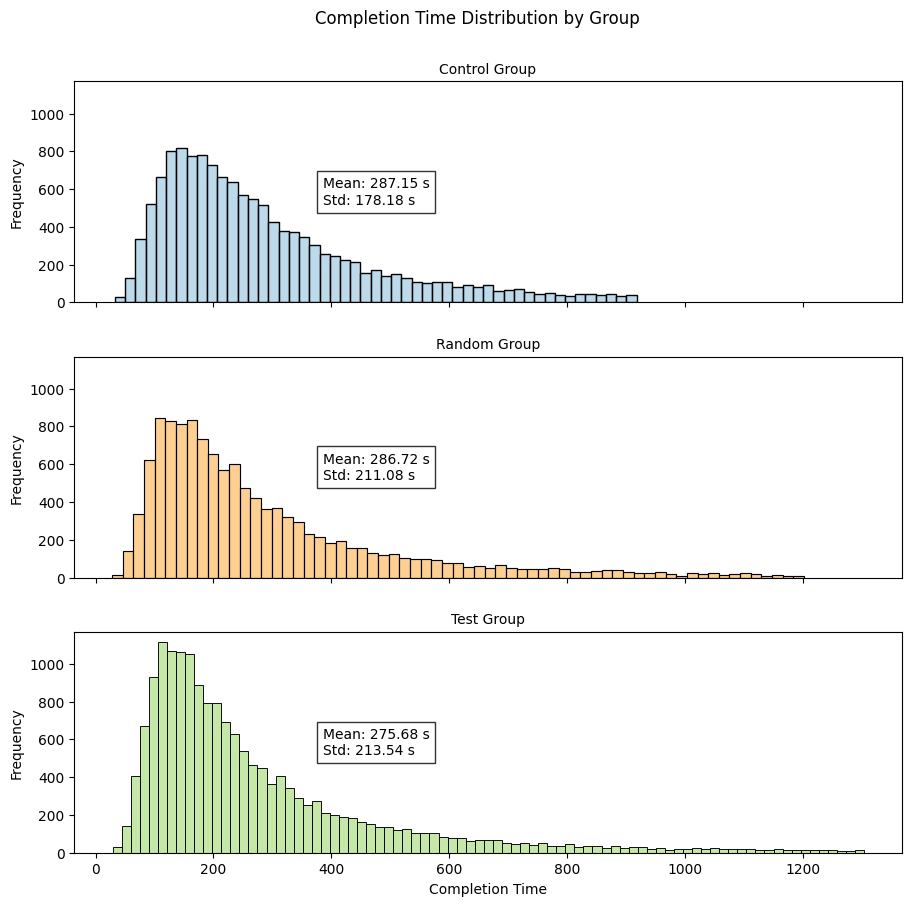

In [136]:
# Calculate mean and std for each group
group_stats = df_outliers.groupby('Variation')['Completion Time'].agg(['mean', 'std']).reset_index()
palette = {"Control": "#a6cee3", "Random": "#fdbf6f", "Test": "#b2df8a"}

# Create the FacetGrid with larger figures and custom palette
g = sns.FacetGrid(df_outliers, col="Variation", col_wrap=1, height=3, aspect=3, sharex=True, sharey=True)

# Function to annotate each plot with mean and std
def annotate(data, ax, **kws):
    variation = data['Variation'].iloc[0]
    stats = group_stats[group_stats['Variation'] == variation]
    mean = stats['mean'].values[0]
    std = stats['std'].values[0]
    ax.text(0.3, 0.5, f'Mean: {mean:.2f} s\nStd: {std:.2f} s', 
            transform=ax.transAxes, 
            fontsize=10, 
            verticalalignment='center',
            horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8))

# Apply the histplot and annotation to each subplot individually
for ax, variation in zip(g.axes.flatten(), palette.keys()):
    subset = df_outliers[df_outliers['Variation'] == variation]
    sns.histplot(subset['Completion Time'], ax=ax, color=palette[variation])
    annotate(subset, ax=ax)
    # Add right and top axes
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

# Add titles and labels
g.set_axis_labels("Completion Time", "Frequency")
g.set_titles(col_template="{col_name} Group")

# Add a main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Completion Time Distribution by Group', fontsize=12)

# Show the plot
plt.show()

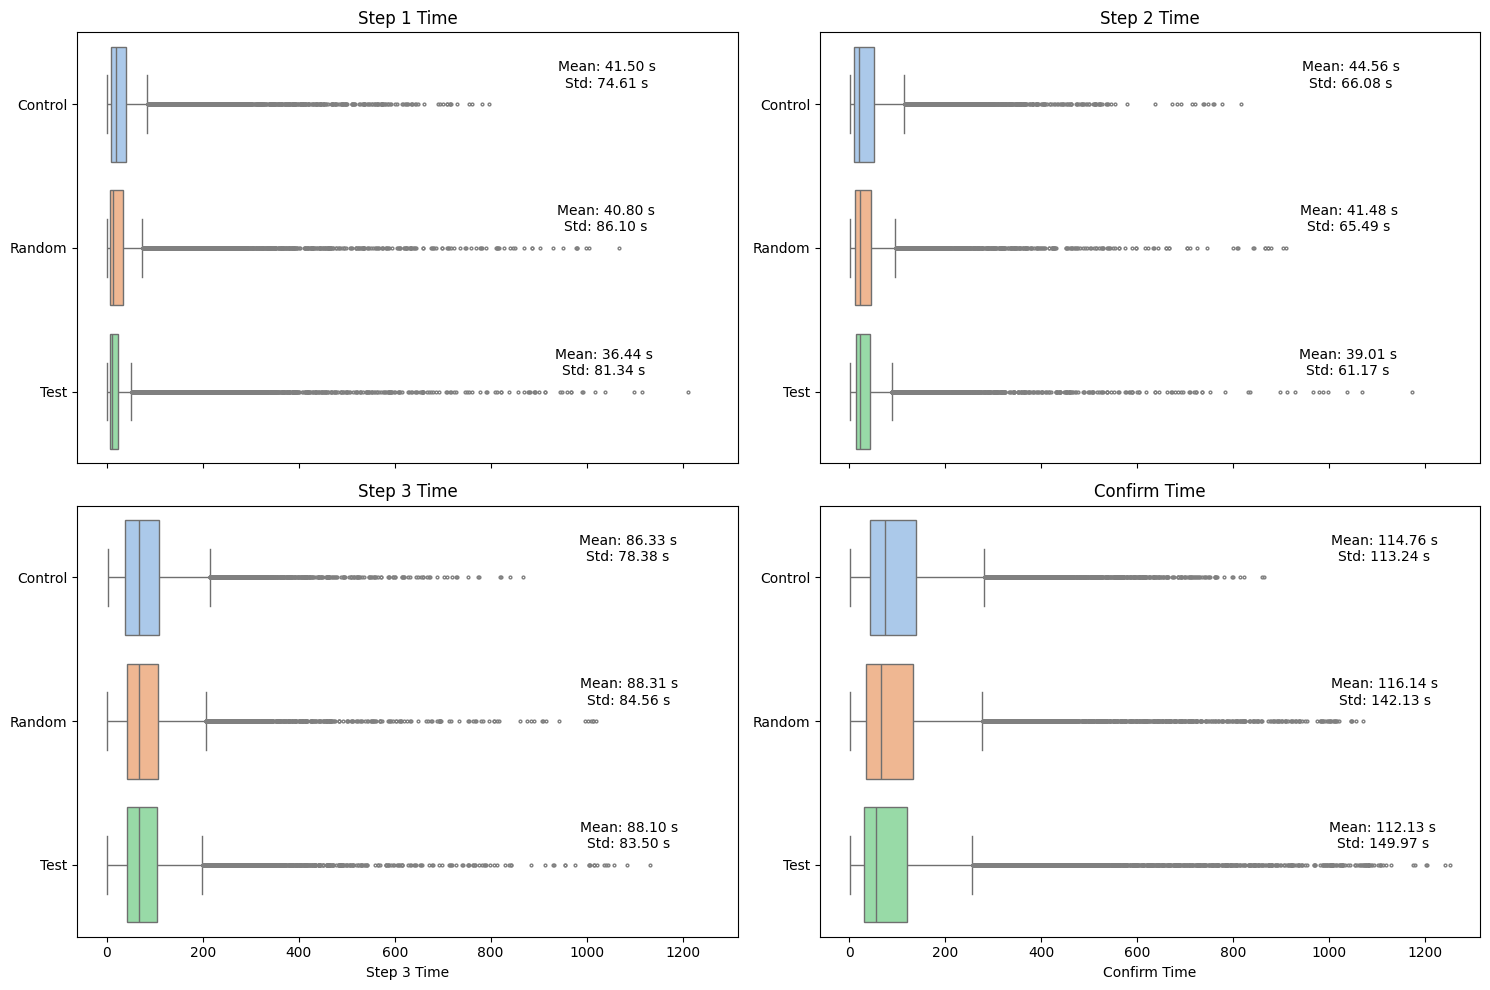

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 10))

# Calculate mean and standard deviation for each component in each subplot
mean_vals_1 = df_outliers.groupby('Variation')['Step 1 Time'].mean()
std_vals_1 = df_outliers.groupby('Variation')['Step 1 Time'].std()

mean_vals_2 = df_outliers.groupby('Variation')['Step 2 Time'].mean()
std_vals_2 = df_outliers.groupby('Variation')['Step 2 Time'].std()

mean_vals_3 = df_outliers.groupby('Variation')['Step 3 Time'].mean()
std_vals_3 = df_outliers.groupby('Variation')['Step 3 Time'].std()

mean_vals_confirm = df_outliers.groupby('Variation')['Confirm Time'].mean()
std_vals_confirm = df_outliers.groupby('Variation')['Confirm Time'].std()

# Boxplot for Step 1 Time
sns.boxplot(data=df_outliers, x='Step 1 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[0, 0],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[0, 0].set_title('Step 1 Time')
axes[0, 0].set_ylabel('')

# Annotate mean and std for Step 1 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_1, std_vals_1)):
    axes[0, 0].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Step 2 Time
sns.boxplot(data=df_outliers, x='Step 2 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[0, 1],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[0, 1].set_title('Step 2 Time')
axes[0, 1].set_ylabel('')

# Annotate mean and std for Step 2 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_2, std_vals_2)):
    axes[0, 1].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Step 3 Time
sns.boxplot(data=df_outliers, x='Step 3 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[1, 0],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[1, 0].set_title('Step 3 Time')
axes[1, 0].set_ylabel('')

# Annotate mean and std for Step 3 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_3, std_vals_3)):
    axes[1, 0].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Confirm Time
sns.boxplot(data=df_outliers, x='Confirm Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[1, 1],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[1, 1].set_title('Confirm Time')
axes[1, 1].set_ylabel('')

# Annotate mean and std for Confirm Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_confirm, std_vals_confirm)):
    axes[1, 1].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()

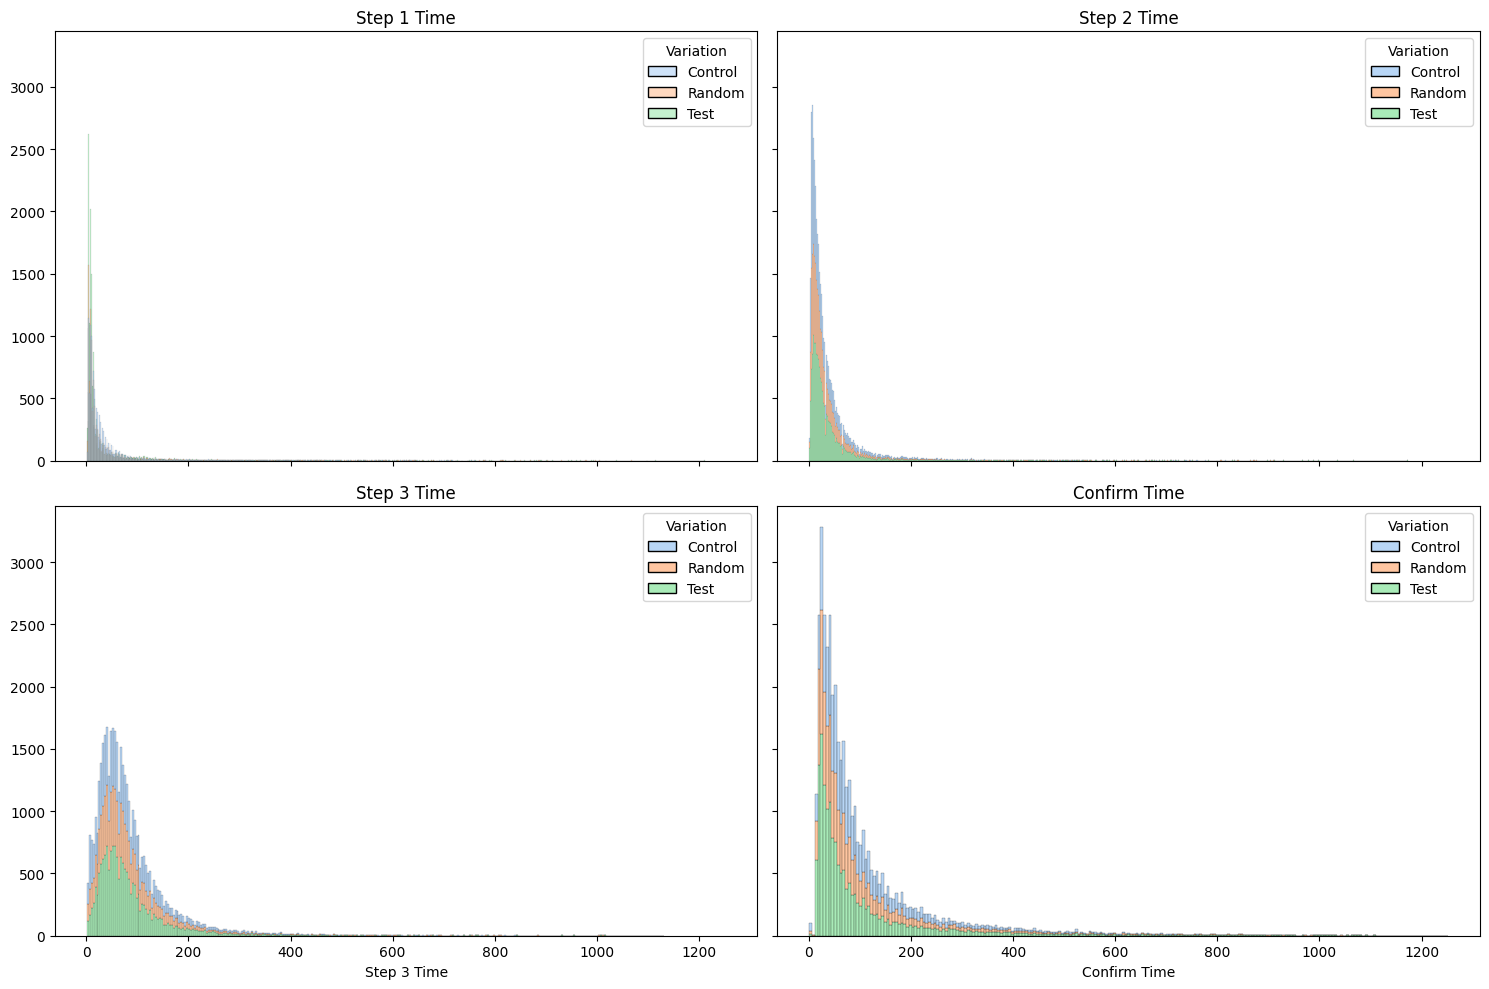

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15, 10))
# Histogram for Step 1 Time
sns.histplot(data=df_outliers, x='Step 1 Time', hue='Variation', palette = 'pastel', ax=axes[0, 0])
axes[0, 0].set_title('Step 1 Time')
axes[0, 0].set_ylabel('')


# Histogram for Step 2 Time
sns.histplot(data=df_outliers, x='Step 2 Time', hue='Variation', multiple='stack', palette = 'pastel', ax=axes[0, 1])
axes[0, 1].set_title('Step 2 Time')
axes[0, 1].set_ylabel('')



# Histogram for Step 3 Time
sns.histplot(data=df_outliers, x='Step 3 Time', hue='Variation', multiple='stack', palette = 'pastel', ax=axes[1, 0])
axes[1, 0].set_title('Step 3 Time')
axes[1, 0].set_ylabel('')



# Histogram for Confirm Time
sns.histplot(data=df_outliers, x='Confirm Time', hue='Variation', multiple='stack', palette = 'pastel', ax=axes[1, 1])
axes[1, 1].set_title('Confirm Time')
axes[1, 1].set_ylabel('')



plt.tight_layout()
plt.show()

## Completion Rate

In [139]:
# total numbers of visits that entered the process
n_test = len(df_data_test_unique_visits['completed']) 
n_control = len(df_data_control_unique_visits['completed'])  
n_random = len(df_data_random_unique_visits['completed']) 
n_test, n_control, n_random

(37136, 32189, 89252)

In [140]:
# total numbers of visits that completed the process
n_test_completed = len(df_test_final) 
n_control_completed = len(df_control_final)  
n_random_completed = len(df_random_final) 
n_test_completed, n_control_completed, n_random_completed

(21365, 15260, 51478)

In [141]:
completion_rate_test = n_test_completed/n_test
completion_rate_control = n_control_completed/n_control
completion_rate_random = n_random_completed/n_random

print (f"Completion rates of the test group: {completion_rate_test*100:.2f} %")
print (f"Completion rates of the control group: {completion_rate_control*100:.2f} %")
print (f"Completion rates of the random group: {completion_rate_random*100:.2f} %")

Completion rates of the test group: 57.53 %
Completion rates of the control group: 47.41 %
Completion rates of the random group: 57.68 %


In [142]:
d = {'group': ['control', 'random', 'test'], 'completion_rate': [completion_rate_control, completion_rate_random, completion_rate_test]}
completion_rate_df = pd.DataFrame(data=d)
completion_rate_df

group  completion_rate
0  control         0.474075
1   random         0.576771
2     test         0.575318

### Completion Rate - Bar plot

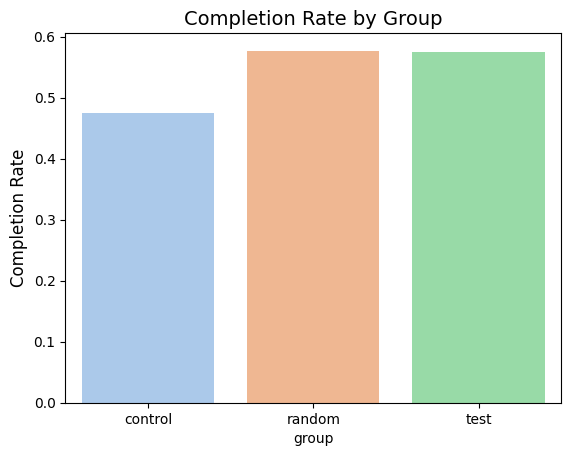

In [143]:
sns.barplot(data= completion_rate_df, x='group', y='completion_rate', hue='group', palette = 'pastel')

# Add labels and title
plt.ylabel('Completion Rate', fontsize=12)  # Label for the y-axis
plt.title('Completion Rate by Group', fontsize=14)  # Title for the plot

# Show the plot
plt.show()

# Random group of users

* control_outliers = df_outliers[df_outliers['Variation'] == 'Control']['Completion Time']
* random_outliers = df_outliers[df_outliers['Variation'] == 'Random']['Completion Time']
* test_outliers = df_outliers[df_outliers['Variation'] == 'Test']['Completion Time']

## Check Statistically difference in Means

In [144]:
test_times = test_outliers
random_times = random_outliers
control_times = control_outliers

In [145]:
from scipy.stats import ttest_ind

# Welch's t-test
_, p_welch_test_random = ttest_ind(test_times, random_times, equal_var=False)
print("P-value for Welch's t-test between test and random groups:", p_welch_test_random)

_, p_welch_control_random = ttest_ind(control_times, random_times, equal_var=False)
print("P-value for Welch's t-test between control and random groups:", p_welch_control_random)

P-value for Welch's t-test between test and random groups: 1.0717470365124802e-05
P-value for Welch's t-test between control and random groups: 0.8609869898747347


## Check Homogeneity of Variances

In [146]:
from scipy.stats import levene

# Levene's Test for equality of variances
_, p_levene = levene(test_times, random_times)
print("P-value for Levene's test between test and random groups:", p_levene)

_, p_levene = levene(control_times, random_times)
print("P-value for Levene's test between control and random groups:", p_levene)



P-value for Levene's test between test and random groups: 0.10165237209751406
P-value for Levene's test between control and random groups: 2.482876447885553e-11


* For the test group versus the random group, there is a significant difference in mean completion times, indicating that the completion times for the test group are likely different from those in the random group.
* For the control group versus the random group, there is no significant difference in mean completion times, suggesting that the completion times for the control group may be similar to those in the random group.
* Levene's test indicates unequal variances between the control and random groups, which could impact the interpretation of the t-test results.

Considering these findings, it seems reasonable to exclude the random group from further analysis, as it may introduce noise or bias due to the significant differences observed in completion times and variances compared to the test and control groups.

# Data Insights

In [147]:
df2 = df_outliers[df_outliers['Variation'].isin(['Control', 'Test'])]

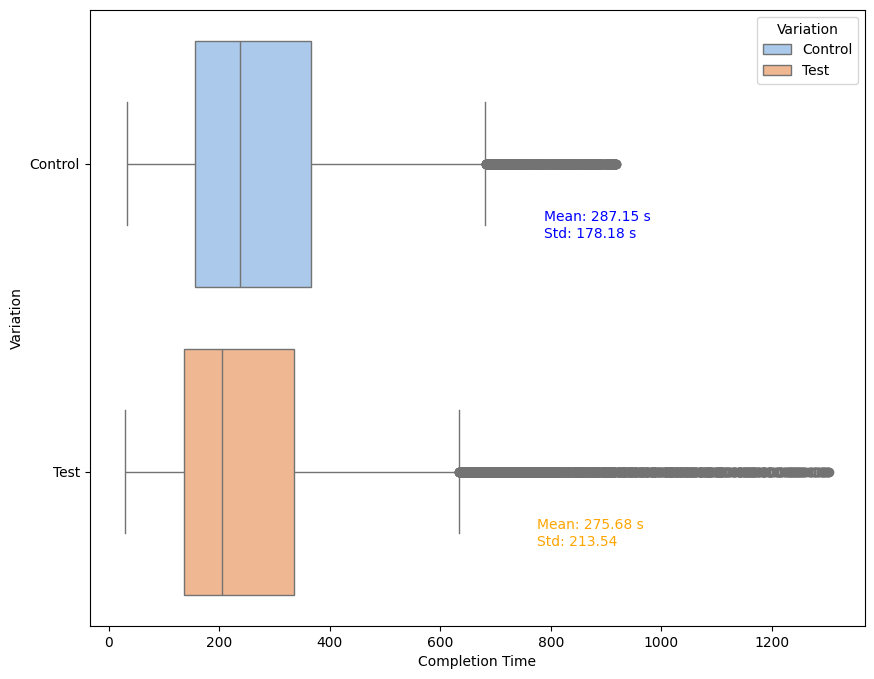

In [148]:
avg_control = df2[df2['Variation']=='Control']['Completion Time'].mean()
std_control = df2[df2['Variation']=='Control']['Completion Time'].std()

avg_test = df2[df2['Variation']=='Test']['Completion Time'].mean()
std_test = df2[df2['Variation']=='Test']['Completion Time'].std()

plt.subplots(figsize=(10, 8))
ax = sns.boxplot(data=df2, x='Completion Time', y='Variation', hue='Variation', palette='pastel', legend=True)

# Annotate mean and std for Control
ax.text(avg_control + 500, 0.2, f'Mean: {avg_control:.2f} s\nStd: {std_control:.2f} s', color='blue', fontsize=10, ha='left', va='center')

# Annotate mean and std for Test
ax.text(avg_test + 500, 1.2, f'Mean: {avg_test:.2f} s\nStd: {std_test:.2f} ', color='orange', fontsize=10, ha='left', va='center')

plt.show()

## KPI: Completion Times

In [149]:
# Welch's t-test
_, p_welch_test_control = ttest_ind(test_times, control_times, equal_var=False)
print("P-value for Welch's t-test between test and control groups:", p_welch_test_control)

P-value for Welch's t-test between test and control groups: 3.106755375717587e-07


There is statistically significant difference in mean completion times between the test group (using the new UI with prompts) and the control group (using the traditional UI). This result supports the hypothesis that the changes introduced in the new UI, along with the prompts, have influenced user behavior. It indicates that the new UI has likely contributed to different completion rates compared to the traditional UI. In conclusion, based on this analysis, Vanguard can consider adopting the new UI, as it appears to lead to significantly different completion rates compared to the traditional UI.

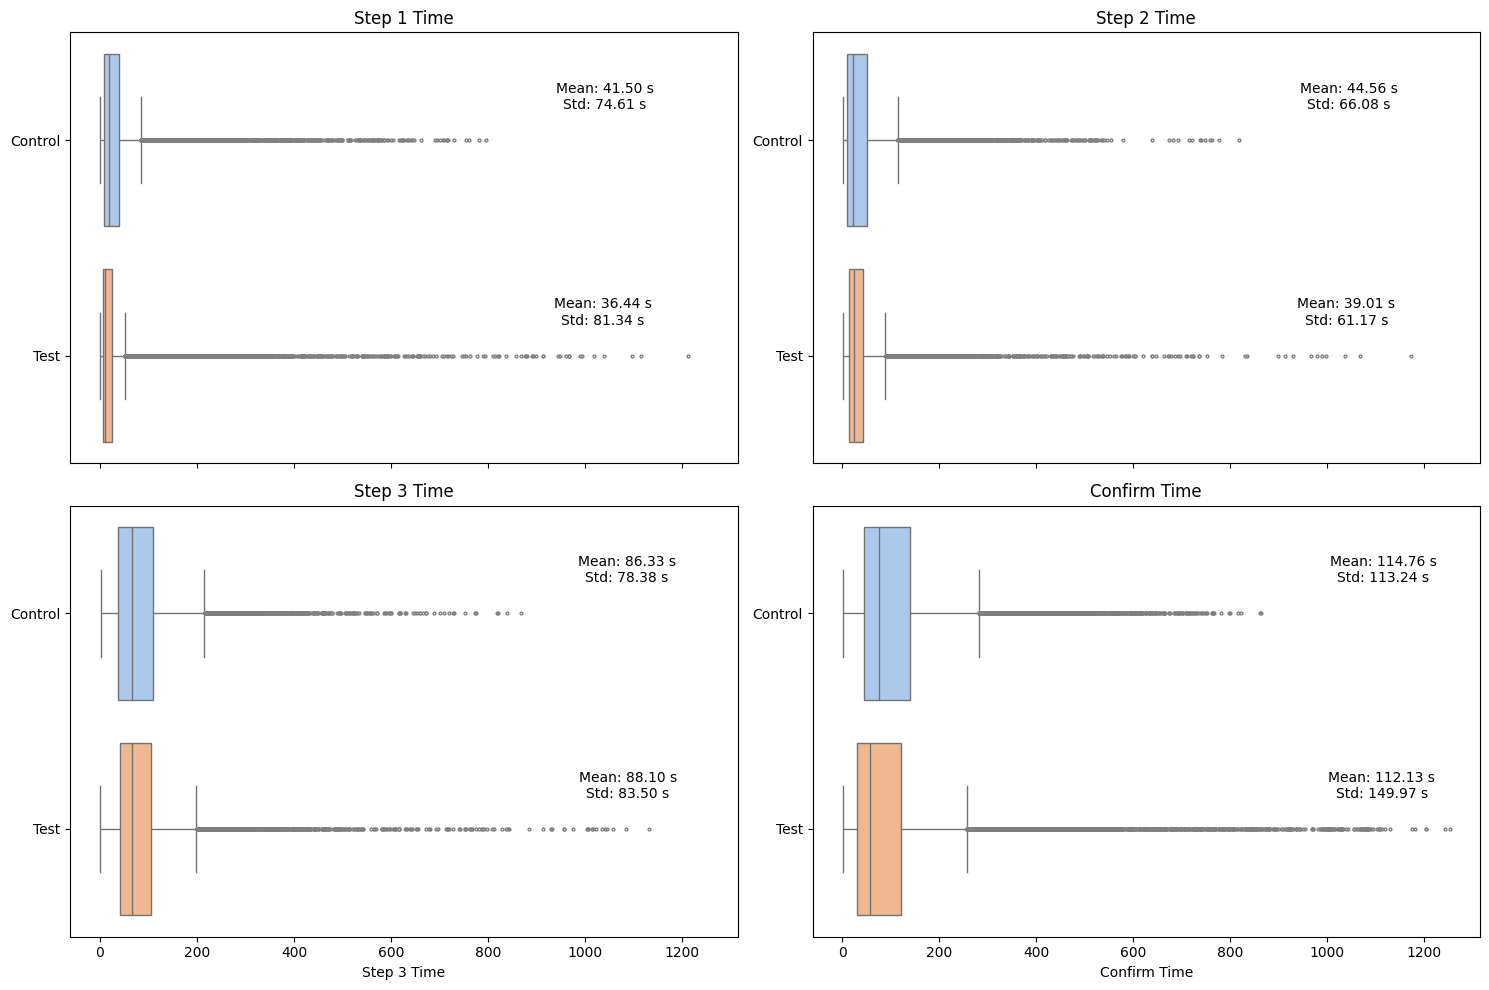

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 10))

# Calculate mean and standard deviation for each component in each subplot
mean_vals_1 = df2.groupby('Variation')['Step 1 Time'].mean()
std_vals_1 = df2.groupby('Variation')['Step 1 Time'].std()

mean_vals_2 = df2.groupby('Variation')['Step 2 Time'].mean()
std_vals_2 = df2.groupby('Variation')['Step 2 Time'].std()

mean_vals_3 = df2.groupby('Variation')['Step 3 Time'].mean()
std_vals_3 = df2.groupby('Variation')['Step 3 Time'].std()

mean_vals_confirm = df2.groupby('Variation')['Confirm Time'].mean()
std_vals_confirm = df2.groupby('Variation')['Confirm Time'].std()

# Boxplot for Step 1 Time
sns.boxplot(data=df2, x='Step 1 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[0, 0],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[0, 0].set_title('Step 1 Time')
axes[0, 0].set_ylabel('')

# Annotate mean and std for Step 1 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_1, std_vals_1)):
    axes[0, 0].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Step 2 Time
sns.boxplot(data=df2, x='Step 2 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[0, 1],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[0, 1].set_title('Step 2 Time')
axes[0, 1].set_ylabel('')

# Annotate mean and std for Step 2 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_2, std_vals_2)):
    axes[0, 1].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Step 3 Time
sns.boxplot(data=df2, x='Step 3 Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[1, 0],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[1, 0].set_title('Step 3 Time')
axes[1, 0].set_ylabel('')

# Annotate mean and std for Step 3 Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_3, std_vals_3)):
    axes[1, 0].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

# Boxplot for Confirm Time
sns.boxplot(data=df2, x='Confirm Time', y='Variation', hue='Variation', palette = 'pastel', ax=axes[1, 1],
            flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='grey', markersize=2, linestyle='none'))
axes[1, 1].set_title('Confirm Time')
axes[1, 1].set_ylabel('')

# Annotate mean and std for Confirm Time
for i, (mean_val, std_val) in enumerate(zip(mean_vals_confirm, std_vals_confirm)):
    axes[1, 1].text(mean_val+1000, i-0.2, f'Mean: {mean_val:.2f} s\nStd: {std_val:.2f} s', fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()

## KPI Step-by-Step Times

In [151]:
control_step1 = df2[df2['Variation'] == 'Control']['Step 1 Time']
test_step1 = df2[df2['Variation'] == 'Test']['Step 1 Time']

# Welch's t-test
_, p_step_1= ttest_ind(control_step1, test_step1, equal_var=False)
print("P-value for Welch's t-test between test and control groups for Step 1 times:", p_step_1)

P-value for Welch's t-test between test and control groups for Step 1 times: 1.5724860056421694e-08


In [152]:
control_step2 = df2[df2['Variation'] == 'Control']['Step 2 Time']
test_step2 = df2[df2['Variation'] == 'Test']['Step 2 Time']

# Welch's t-test
_, p_step_2= ttest_ind(control_step2, test_step2, equal_var=False)
print("P-value for Welch's t-test between test and control groups for Step 2 times:", p_step_2)

P-value for Welch's t-test between test and control groups for Step 2 times: 5.2510442452034027e-14


In [153]:
control_step3 = df2[df2['Variation'] == 'Control']['Step 3 Time']
test_step3 = df2[df2['Variation'] == 'Test']['Step 3 Time']

# Welch's t-test
_, p_step_3= ttest_ind(control_step3, test_step3, equal_var=False)
print("P-value for Welch's t-test between test and control groups for Step 3 times:", p_step_3)

P-value for Welch's t-test between test and control groups for Step 3 times: 0.057424901972826396


In [154]:
control_confirm = df2[df2['Variation'] == 'Control']['Confirm Time']
test_confirm = df2[df2['Variation'] == 'Test']['Confirm Time']

# Welch's t-test
_, p_confirm= ttest_ind(control_confirm, test_confirm, equal_var=False)
print("P-value for Welch's t-test between test and control groups for Step 3 times:", p_confirm)

P-value for Welch's t-test between test and control groups for Step 3 times: 0.08068017791696683


* These results indicate that the new UI and prompts have a significant impact on completion times at Steps 1 and 2 of the process, potentially facilitating faster progression through these initial stages.
* However, there doesn't seem to be a significant difference in completion times at Steps 3 and the Confirmation Page between the test and control groups. Such observation can guide Vanguard in refining specific aspects of the UI to further enhance the user experience and streamline the completion process.

## Segmentation Analysis

clnt tenure month, clnt_age, gendr, bal

In [335]:
df1 = pd.concat([df_data_control_unique_visits, df_data_test_unique_visits], axis=0, ignore_index=True)

In [336]:
df3 = pd.concat([df1, df2], axis=0, ignore_index=True)

In [337]:
df4= df3.drop_duplicates(subset='visit_id', keep = 'last')

In [338]:
df_control = df4[df4['Variation'] == 'Control']
df_test = df4[df4['Variation'] == 'Test']

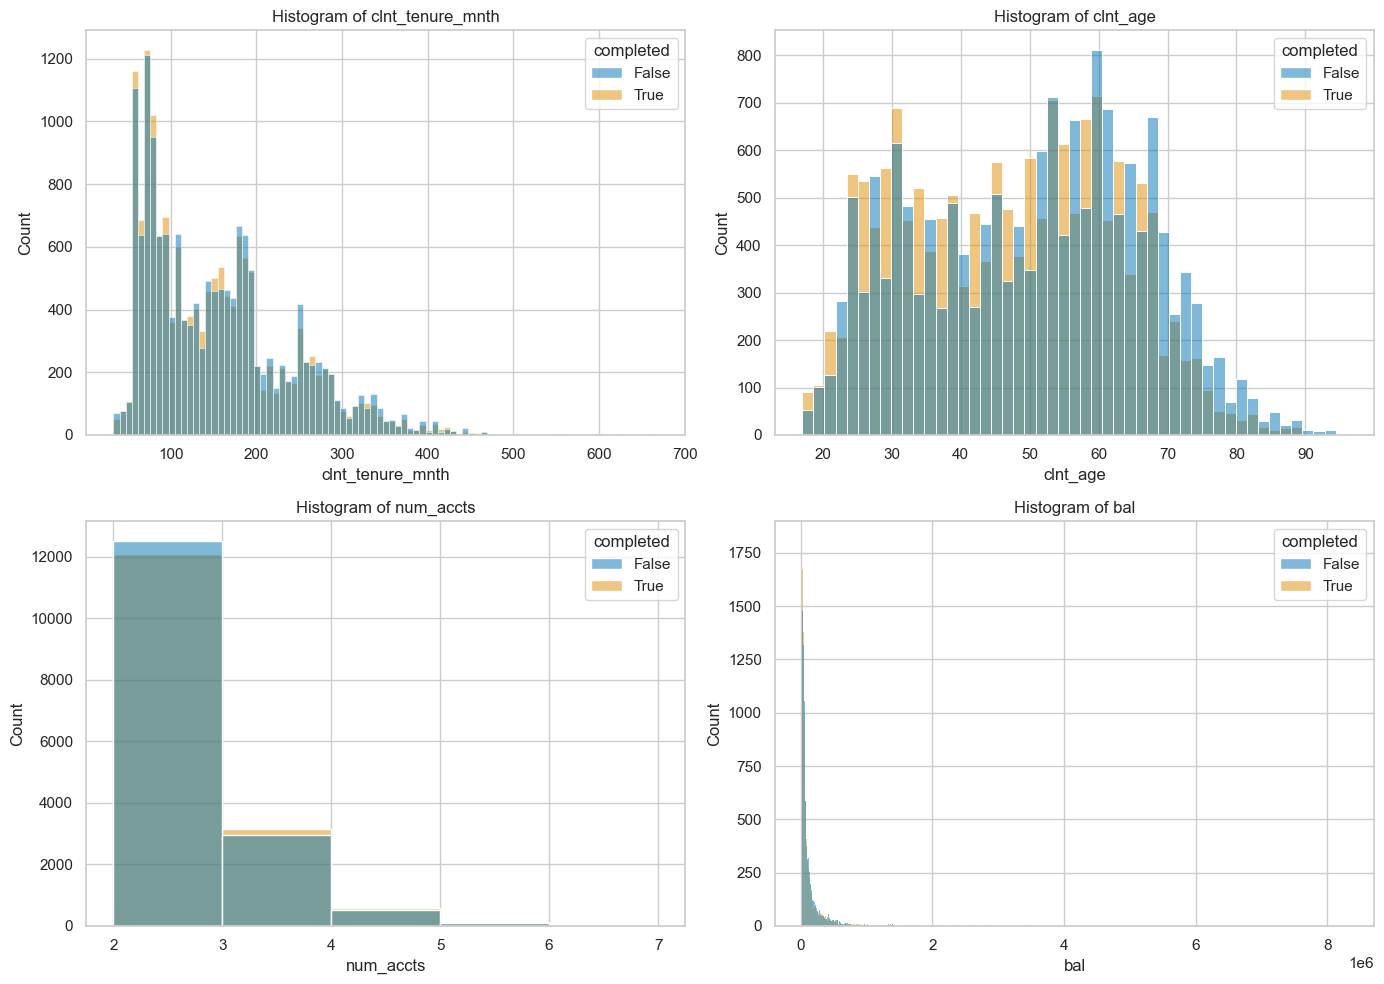

In [339]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'clnt_tenure_mnth'
sns.histplot(data=df_control, x='clnt_tenure_mnth', hue='completed', palette='colorblind', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of clnt_tenure_mnth')

# Plot for 'clnt_age'
sns.histplot(data=df_control, x='clnt_age', hue='completed',  palette='colorblind', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of clnt_age')

# Plot for 'num_accts'
sns.histplot(data=df_control, x='num_accts', hue='completed', bins=5, palette='colorblind', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of num_accts')

# Plot for 'bal'
sns.histplot(data=df_control, x='bal', hue='completed',  palette='colorblind', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of bal')

# Adjust the layout
plt.tight_layout()
plt.show()

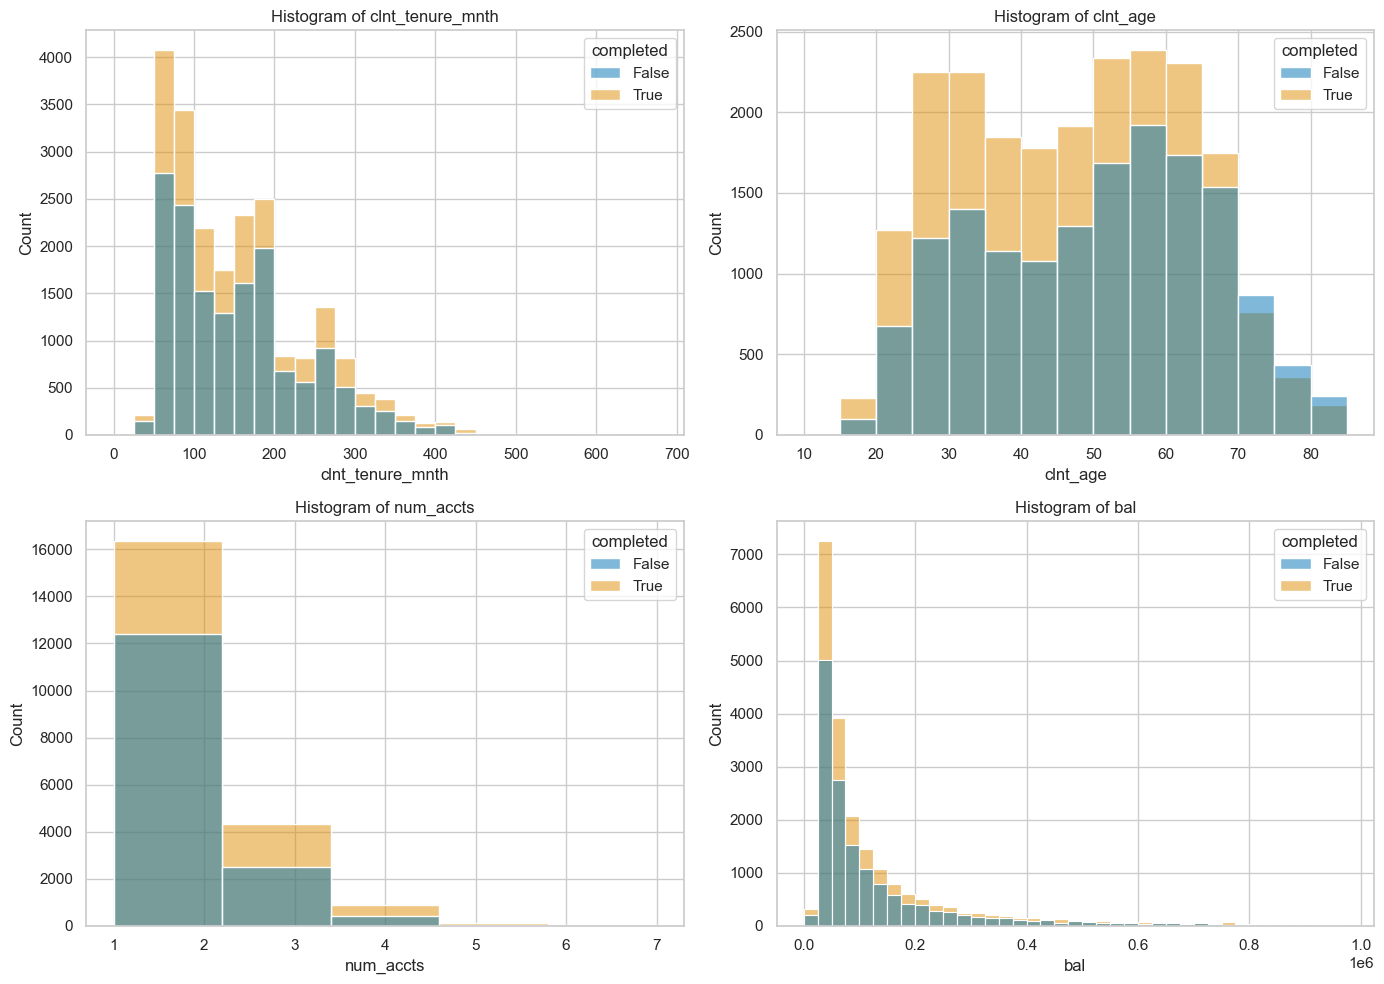

In [340]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'clnt_tenure_mnth'
bin_edges = np.arange(0, 700, 25)
sns.histplot(data=df_test, x='clnt_tenure_mnth', hue='completed',  bins = bin_edges,  palette='colorblind', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of clnt_tenure_mnth')

# Plot for 'clnt_age'
bin_edges = np.arange(10, 90, 5)
sns.histplot(data=df_test, x='clnt_age', bins = bin_edges, hue='completed', palette='colorblind', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of clnt_age')

# Plot for 'num_accts'
sns.histplot(data=df_test, x='num_accts', hue='completed',  bins=5, palette='colorblind', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of num_accts')

# Plot for 'bal'
bin_edges = np.arange(0, 1000000, 25000)
sns.histplot(data=df_test, x='bal', hue='completed', bins = bin_edges, palette='colorblind', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of bal')

# Adjust the layout
plt.tight_layout()
plt.show()

### Client Age & Completion Rate

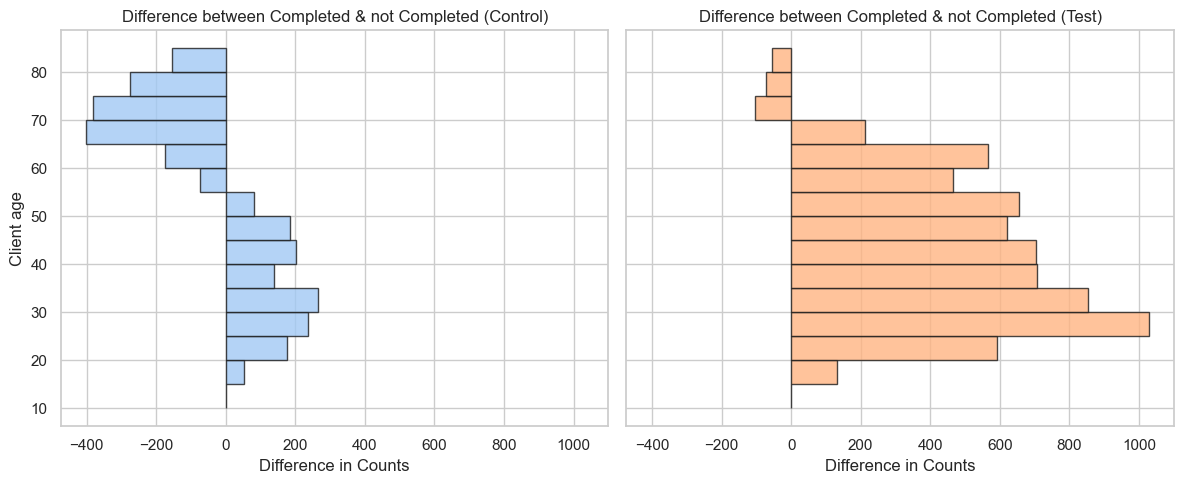

In [341]:
# Define bin edges
bin_edges = np.arange(10, 90, 5)

# Calculate histograms for each distribution
a_hist1, _ = np.histogram(df_control[df_control['completed'] == True]['clnt_age'], bins=bin_edges)
b_hist1, _ = np.histogram(df_control[df_control['completed'] == False]['clnt_age'], bins=bin_edges)

a_hist2, _ = np.histogram(df_test[df_test['completed'] == True]['clnt_age'], bins=bin_edges)
b_hist2, _ = np.histogram(df_test[df_test['completed'] == False]['clnt_age'], bins=bin_edges)

# Calculate bin midpoints
bin_midpoints = bin_edges[:-1] + np.diff(bin_edges) / 2

# Calculate the difference
h_diff1 = a_hist1 - b_hist1
h_diff2 = a_hist2 - b_hist2

# Plot the difference using seaborn
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 5))  # 1 row, 2 columns

# Plot for Control Variation
axes[0].barh(y=bin_midpoints, width=h_diff1, color=sns.color_palette("pastel")[0], height=5, ec='k', alpha=0.8)
axes[0].set_ylabel('Client age')
axes[0].set_xlabel('Difference in Counts')
axes[0].set_title('Difference between Completed & not Completed (Control)')

# Plot for Test Variation
axes[1].barh(y=bin_midpoints, width=h_diff2, color=sns.color_palette("pastel")[1], height=5, ec='k', alpha=0.8)
axes[1].set_xlabel('Difference in Counts')
axes[1].set_title('Difference between Completed & not Completed (Test)')

plt.tight_layout()
plt.show()

### Client Tenure & Completion Rate

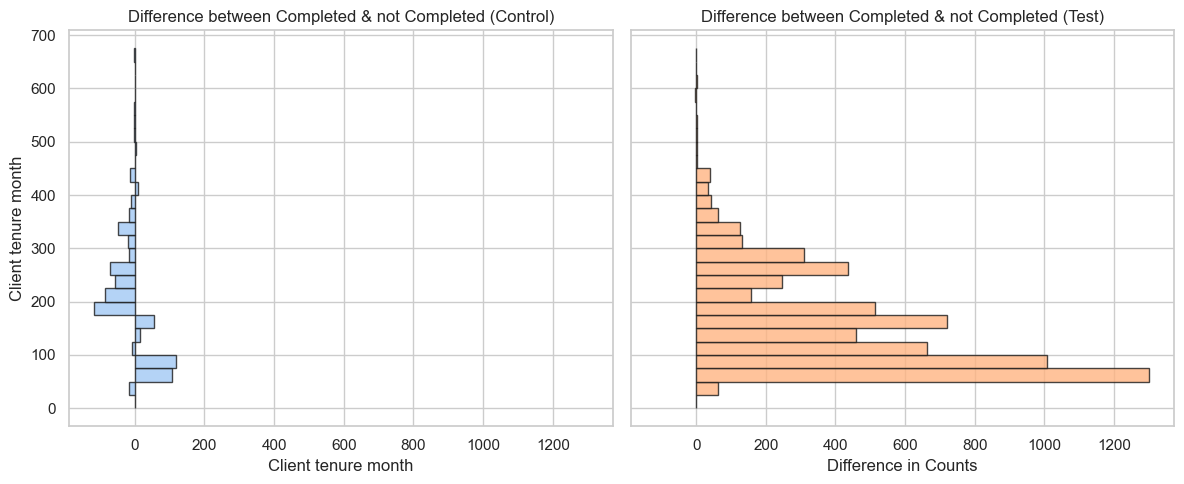

In [342]:
# Define bin edges
bin_edges = np.arange(0, 700, 25)

# Calculate histograms for each distribution
a_hist1, _ = np.histogram(df_control[df_control['completed'] == True]['clnt_tenure_mnth'], bins=bin_edges)
b_hist1, _ = np.histogram(df_control[df_control['completed'] == False]['clnt_tenure_mnth'], bins=bin_edges)

a_hist2, _ = np.histogram(df_test[df_test['completed'] == True]['clnt_tenure_mnth'], bins=bin_edges)
b_hist2, _ = np.histogram(df_test[df_test['completed'] == False]['clnt_tenure_mnth'], bins=bin_edges)

# Calculate bin midpoints
bin_midpoints = bin_edges[:-1] + np.diff(bin_edges) / 2

# Calculate the difference
h_diff1 = a_hist1 - b_hist1
h_diff2 = a_hist2 - b_hist2

# Plot the difference using seaborn
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 5))  # 1 row, 2 columns

# Plot for Control Variation
axes[0].barh(y=bin_midpoints, width=h_diff1, height=25, color=sns.color_palette("pastel")[0], ec='k', alpha=0.8)
axes[0].set_ylabel('Client tenure month')
axes[0].set_xlabel('Client tenure month')
axes[0].set_title('Difference between Completed & not Completed (Control)')

# Plot for Test Variation
axes[1].barh(y=bin_midpoints, width=h_diff2, height=25, color=sns.color_palette("pastel")[1], ec='k', alpha=0.8)
axes[1].set_xlabel('Difference in Counts')
axes[1].set_title('Difference between Completed & not Completed (Test)')

plt.tight_layout()
plt.show()

### Client Balance & Completion Rate

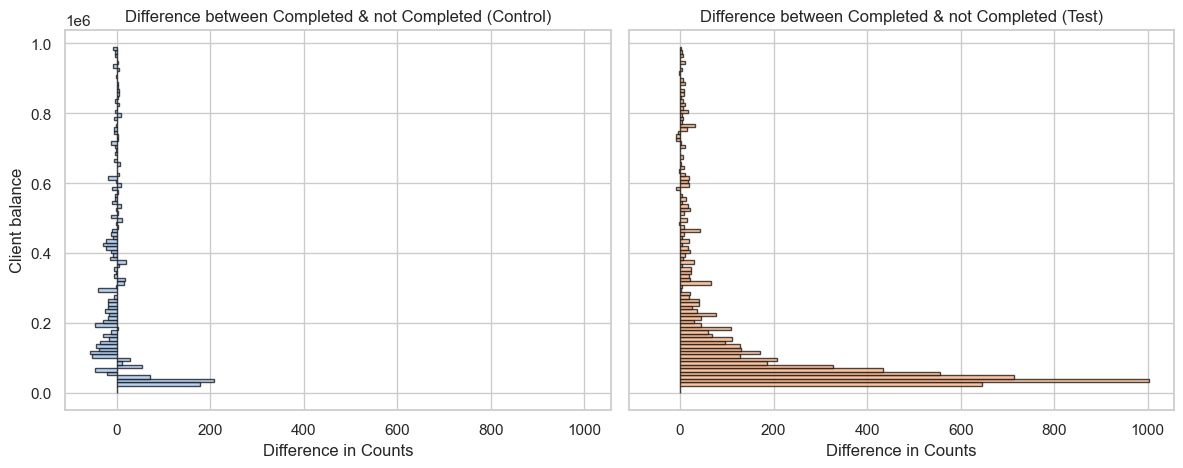

In [343]:
# Define bin edges
#bin_edges = np.arange(0, 40, 1)
bin_edges = np.arange(0, 1000000, 10000)
# Calculate histograms for each distribution
a_hist1, _ = np.histogram(df_control[df_control['completed'] == True]['bal'], bins=bin_edges)
b_hist1, _ = np.histogram(df_control[df_control['completed'] == False]['bal'], bins=bin_edges)

a_hist2, _ = np.histogram(df_test[df_test['completed'] == True]['bal'], bins=bin_edges)
b_hist2, _ = np.histogram(df_test[df_test['completed'] == False]['bal'], bins=bin_edges)

# Calculate bin midpoints
bin_midpoints = bin_edges[:-1] + np.diff(bin_edges) / 2

# Calculate the difference
h_diff1 = a_hist1 - b_hist1
h_diff2 = a_hist2 - b_hist2

# Plot the difference using seaborn
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 5))  # 1 row, 2 columns

# Plot for Control Variation
axes[0].barh(y=bin_midpoints, width=h_diff1, height=10000, color=sns.color_palette("pastel")[0], ec='k', alpha=0.8)
axes[0].set_ylabel('Client balance')
axes[0].set_xlabel('Difference in Counts')
axes[0].set_title('Difference between Completed & not Completed (Control)')

# Plot for Test Variation
axes[1].barh(y=bin_midpoints, width=h_diff2, height=10000, color=sns.color_palette("pastel")[1], ec='k', alpha=0.8)
axes[1].set_xlabel('Difference in Counts')
axes[1].set_title('Difference between Completed & not Completed (Test)')

plt.tight_layout()
plt.show()

* Age:
Clients aged 55 to 85 in the control group face more challenges, leading to higher unsuccessful attempts. This could be due to less familiarity with digital interfaces or additional complexity in their financial situations.
In the test group, the new UI and in-context prompts seem to benefit younger clients more, but older clients still face challenges, although less severe than in the control group.


* Tenure:
Newer clients in the test group exhibit higher success rates, suggesting that the new UI and prompts are more intuitive for clients who are less familiar with the traditional process. The control group shows no clear pattern, indicating that tenure does not impact completion rates under the traditional UI.

* Balance:
In the test group, clients with smaller balances show higher success rates, potentially indicating that their financial situations are simpler and easier to navigate with the new UI. The control group again shows no clear pattern, suggesting that balance does not influence completion rates under the traditional UI.

In [344]:
# Create contingency tables for each variable with completion status
age_contingency = pd.crosstab(df_test['clnt_age'], df_test['completed'])
tenure_contingency = pd.crosstab(df_test['clnt_tenure_mnth'], df_test['completed'])
balance_contingency = pd.crosstab(df_test['bal'], df_test['completed'])

In [345]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
_, p_age, _, _ = chi2_contingency(age_contingency)
_, p_tenure, _, _ = chi2_contingency(tenure_contingency)
_, p_balance, _, _ = chi2_contingency(balance_contingency)

print("P-value for age group and completion status:", p_age)
print("P-value for tenure group and completion status:", p_tenure)
print("P-value for balance group and completion status:", p_balance)

P-value for age group and completion status: 0.0
P-value for tenure group and completion status: 5.1137216826334214e-08
P-value for balance group and completion status: 9.880551087032125e-12


These p-values are very small, indicating highly significant relationships between completion status and the variables age, tenure, and balance of clients using the UI.

<Axes: xlabel='completed', ylabel='clnt_age'>

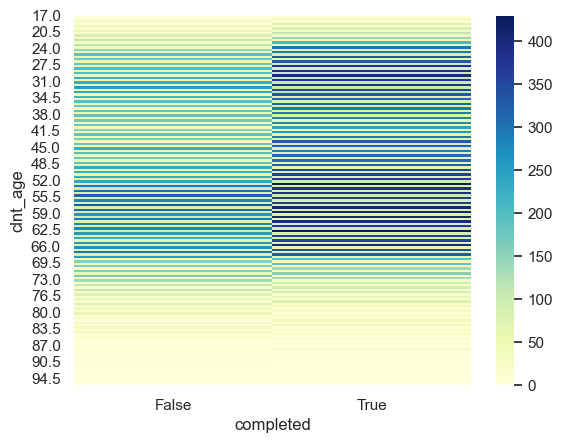

In [346]:
sns.heatmap(age_contingency, cmap="YlGnBu", fmt="d")

In [347]:
# Create contingency tables for each variable with completion status
age_contingency = pd.crosstab(df_control['clnt_age'], df_control['completed'])
tenure_contingency = pd.crosstab(df_control['clnt_tenure_mnth'], df_control['completed'])
balance_contingency = pd.crosstab(df_control['bal'], df_control['completed'])

In [348]:

# Perform Chi-square test
_, p_age, _, _ = chi2_contingency(age_contingency)
_, p_tenure, _, _ = chi2_contingency(tenure_contingency)
_, p_balance, _, _ = chi2_contingency(balance_contingency)

print("P-value for age group and completion status:", p_age)
print("P-value for tenure group and completion status:", p_tenure)
print("P-value for balance group and completion status:", p_balance)

P-value for age group and completion status: 0.0
P-value for tenure group and completion status: 0.011038384984488172
P-value for balance group and completion status: 0.9172849300546269


These findings suggest that while age and tenure have notable effects on completion rates for clients using the traditional UI, balance does not exhibit significant influence.

### Client Demographic & Completion Time

In [349]:
df_numerical = df4.select_dtypes("number")

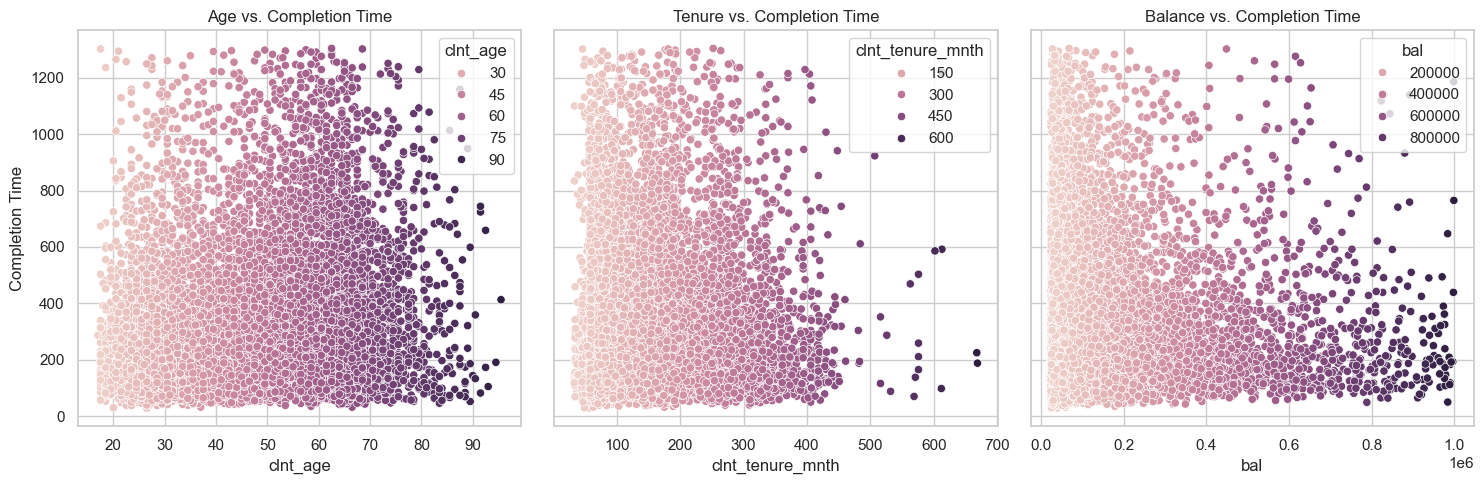

In [351]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15, 5))

# Scatterplot for age
sns.scatterplot(data=df_test, x='clnt_age', y='Completion Time', hue='clnt_age', ax=axes[0])
axes[0].set_title('Age vs. Completion Time')

# Scatterplot for tenure
sns.scatterplot(data=df_test, x='clnt_tenure_mnth', y='Completion Time', hue='clnt_tenure_mnth', ax=axes[1])
axes[1].set_title('Tenure vs. Completion Time')

# Scatterplot for balance
df_test_f = df_test[df_test['bal'] <= 1000000]
sns.scatterplot(data=df_test_f, x='bal', y='Completion Time', hue='bal', ax=axes[2])
axes[2].set_title('Balance vs. Completion Time')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The F value in one way ANOVA is a tool to help you answer the question “Is the variance between the means of two populations significantly different?” 

In [412]:
from scipy.stats import f_oneway

# Categorize age into groups with sufficient range and non-empty bins
df_test['age_group'] = pd.cut(df_test['clnt_age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                              labels=['a1. <20', 'a2. 20-30', 'a3. 30-40', 'a4. 40-50', 'a5. 50-60', 'a6. 60-70', 'a7. 70+'])

# Check the distribution of data in each group
print("Distribution of age groups:")
print(df_test['age_group'].value_counts())

# Ensure there are enough data points in each group and variability within groups
age_groups = df_test['age_group'].dropna().unique()

# Prepare data for ANOVA by collecting Completion Time for each group
age_grouped_data = [df_test[df_test['age_group'] == group]['Completion Time'].dropna() for group in age_groups]

# Check variability within each group and filter out groups with insufficient variability or data
valid_age_grouped_data = [data for data in age_grouped_data if len(data) > 1 and data.var() > 0]

# Perform ANOVA if there is enough data and variability
try:
    if len(valid_age_grouped_data) > 1:
        f_statistic_age, p_value_anova_age = f_oneway(*valid_age_grouped_data)
        print(f"ANOVA F-statistic for age groups: {f_statistic_age}, P-value: {p_value_anova_age}")
    else:
        print("Not enough valid groups to perform ANOVA.")
except ValueError as e:
    print(f"Error performing ANOVA: {e}")

Distribution of age groups:
age_group
a5. 50-60    3651
a3. 30-40    3407
a2. 20-30    3059
a4. 40-50    3037
a6. 60-70    2904
a7. 70+       814
a1. <20       213
Name: count, dtype: int64
ANOVA F-statistic for age groups: 134.26098216658718, P-value: 8.816259321623283e-167


Text(0.5, 1.0, "Tukey's HSD Test Results")

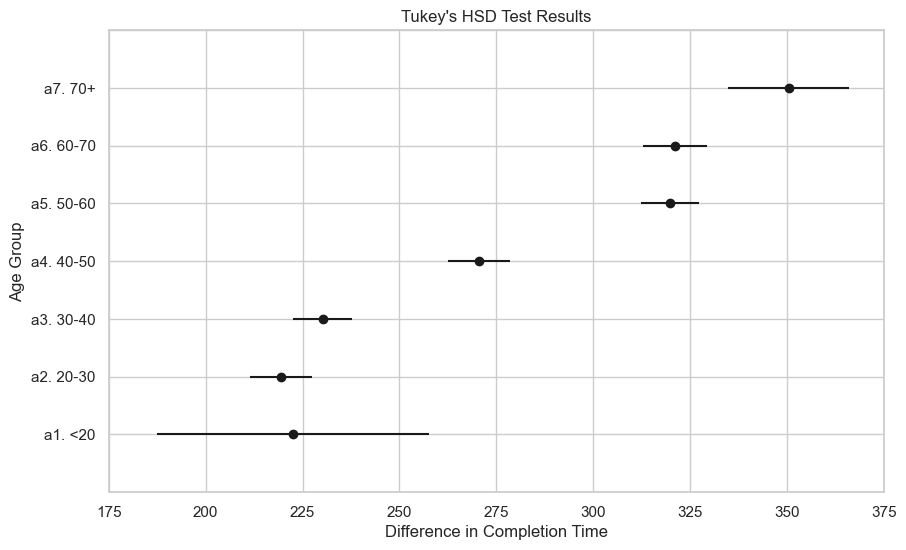

In [413]:
tukey_result1 = pairwise_tukeyhsd(endog=df_test['Completion Time'], groups=df_test['age_group'], alpha=0.05)

# Plot the results
tukey_result1.plot_simultaneous(ylabel='Age Group', xlabel='Difference in Completion Time')
plt.xlim((175, 375))
plt.title("Tukey's HSD Test Results")

* F-statistic: This value measures the ratio of the variance between the groups to the variance within the groups. A higher F-statistic typically indicates that there is a significant difference between the means of the groups.
* P-value: This indicates the probability that the observed differences between the groups happened by chance. A very small P-value (much less than 0.05) suggests that the differences between the groups are statistically significant.

Since the P-value is extremely low, we reject the null hypothesis that there are no differences between the means of completion times across different age groups. This implies that age has a significant effect on the completion time.

In [414]:
# Categorize tenure into groups with sufficient range and non-empty bins
df_test['tenure_group'] = pd.cut(df_test['clnt_tenure_mnth'], bins=[0, 100, 150, 200, 250, 300, 350, 800], 
                                 labels=['b1. <100', 'b2. 100-150', 'b3. 150-200', 'b4. 200-250', 'b5. 250-300', 'b6. 300-350', 'b7. 350+'])

# Check the distribution of data in each group
print("Distribution of tenure groups:")
print(df_test['tenure_group'].value_counts())

# Ensure there are enough data points in each group and variability within groups
tenure_groups = df_test['tenure_group'].dropna().unique()

# Prepare data for ANOVA by collecting Completion Time for each group
tenure_grouped_data = [df_test[df_test['tenure_group'] == group]['Completion Time'].dropna() for group in tenure_groups]

# Check variability within each group and filter out groups with insufficient variability or data
valid_tenure_grouped_data = [data for data in tenure_grouped_data if len(data) > 1 and data.var() > 0]

# Perform ANOVA if there is enough data and variability
try:
    if len(valid_tenure_grouped_data) > 1:
        f_statistic_tenure, p_value_anova_tenure = f_oneway(*valid_tenure_grouped_data)
        print(f"ANOVA F-statistic for age groups: {f_statistic_tenure}, P-value: {p_value_anova_tenure}")
    else:
        print("Not enough valid groups to perform ANOVA.")
except ValueError as e:
    print(f"Error performing ANOVA: {e}")

Distribution of tenure groups:
tenure_group
b1. <100       6428
b3. 150-200    3801
b2. 100-150    3254
b5. 250-300    1441
b4. 200-250    1291
b6. 300-350     520
b7. 350+        350
Name: count, dtype: int64
ANOVA F-statistic for age groups: 7.021686907239434, P-value: 1.7705365696087123e-07


Text(0.5, 1.0, "Tukey's HSD Test Results")

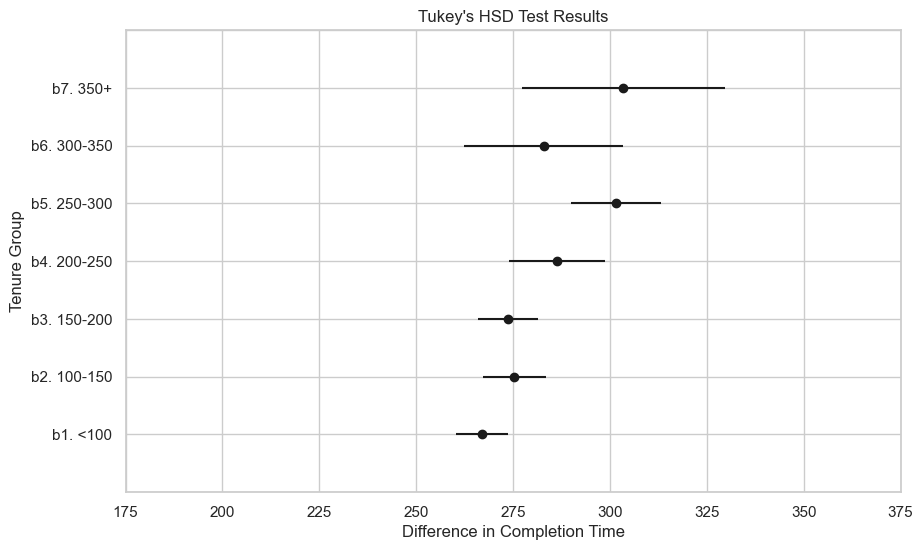

In [415]:
tukey_result1 = pairwise_tukeyhsd(endog=df_test['Completion Time'], groups=df_test['tenure_group'], alpha=0.05)

# Plot the results
tukey_result1.plot_simultaneous(ylabel='Tenure Group', xlabel='Difference in Completion Time')
plt.xlim((175, 375))
plt.title("Tukey's HSD Test Results")

* F-statistic: This value indicates a notable difference in the variance of completion times between the tenure groups.
* P-value: A very small P-value (much less than 0.05) suggests that the differences in completion times between the tenure groups are statistically significant.

Since the P-value is extremely low, we reject the null hypothesis that there are no differences between the means of completion times across different tenure groups. This implies that tenure has a significant effect on the completion time.

In [418]:
# Categorize balance into groups with sufficient range and non-empty bins
df_test['balance_group'] = pd.cut(df_test['bal'], 
                                  bins=[0, 50000, 100000, 200000, 300000, 400000, 500000, 600000, df_test['bal'].max()], 
                                  labels=['c1. <50K','c2. 50-100K', 'c3. 100-200K', 'c4. 200-300K', 'c5. 300-400K', 'c6. 400-500K', 'c7. 500-600K', 'c8. 600+'])

# Check the distribution of data in each group
print("Distribution of balance groups:")
print(df_test['balance_group'].value_counts())

# Ensure there are enough data points in each group and variability within groups
balance_groups = df_test['balance_group'].dropna().unique()

# Prepare data for ANOVA by collecting Completion Time for each group
balance_grouped_data = [df_test[df_test['balance_group'] == group]['Completion Time'].dropna() for group in balance_groups]

# Check variability within each group and filter out groups with insufficient variability or data
valid_balance_grouped_data = [data for data in balance_grouped_data if len(data) > 1 and data.var() > 0]

# Perform ANOVA if there is enough data and variability
try:
    if len(valid_balance_grouped_data) > 1:
        f_statistic_balance, p_value_anova_balance = f_oneway(*valid_balance_grouped_data)
        print(f"ANOVA F-statistic for balance groups: {f_statistic_balance}, P-value: {p_value_anova_balance}")
    else:
        print("Not enough valid groups to perform ANOVA.")
except ValueError as e:
    print(f"Error performing ANOVA: {e}")

Distribution of balance groups:
balance_group
c1. <50K        6392
c2. 50-100K     4854
c3. 100-200K    2924
c4. 200-300K    1086
c8. 600+         690
c5. 300-400K     550
c6. 400-500K     355
c7. 500-600K     234
Name: count, dtype: int64
ANOVA F-statistic for balance groups: 14.416351954930533, P-value: 7.986705157677503e-19


C:\Users\salto\Documents\DataAnalytics\Module2-Project\m2_venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Text(0.5, 1.0, "Tukey's HSD Test Results")

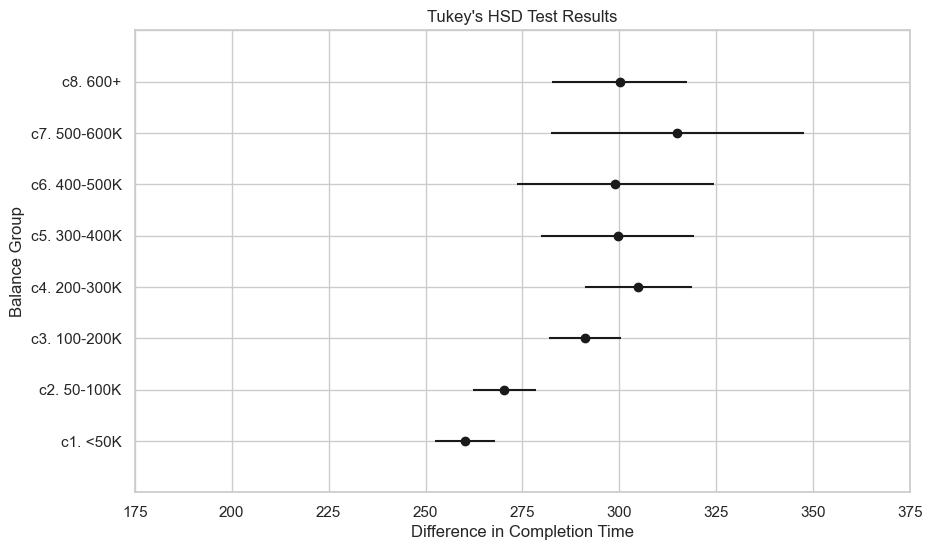

In [419]:
tukey_result1 = pairwise_tukeyhsd(endog=df_test['Completion Time'], groups=df_test['balance_group'], alpha=0.05)

# Plot the results
tukey_result1.plot_simultaneous(ylabel='Balance Group', xlabel='Difference in Completion Time')
plt.xlim((175, 375))
plt.title("Tukey's HSD Test Results")

* F-statistic: This value indicates a notable difference in the variance of completion times between the balance groups.
* P-value: A very small P-value (much less than 0.05) suggests that the differences in completion times between the balance groups are statistically significant.

Since the P-value is extremely low, we reject the null hypothesis that there are no differences between the means of completion times across different balance groups. This implies that the balance amount has a significant effect on the completion time.

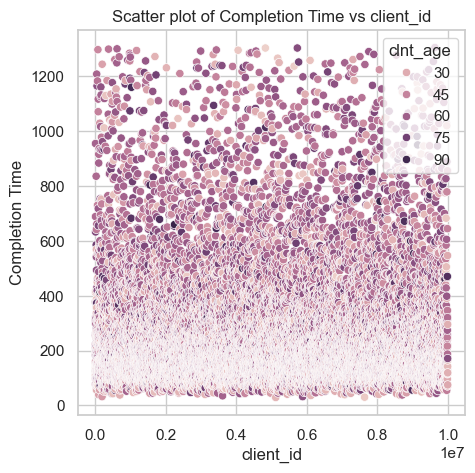

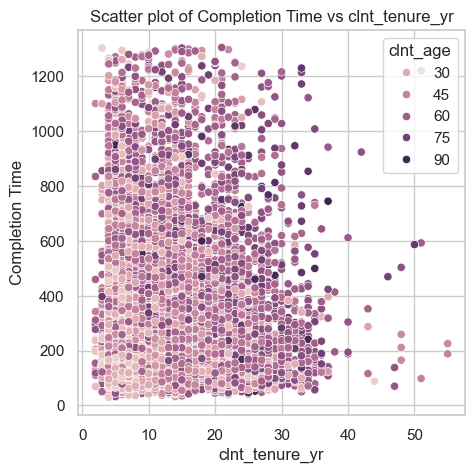

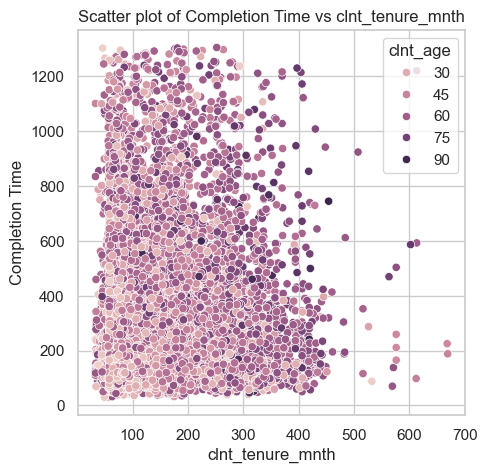

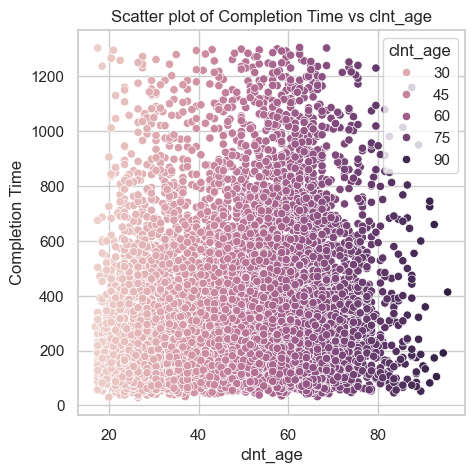

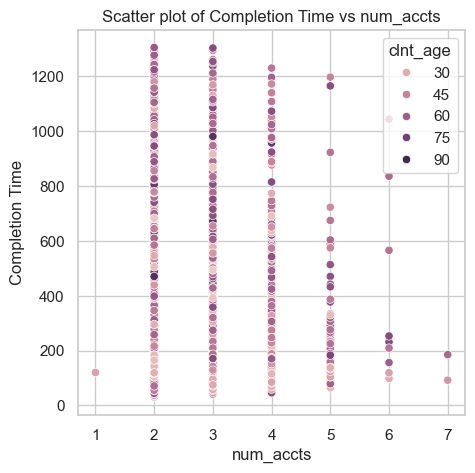

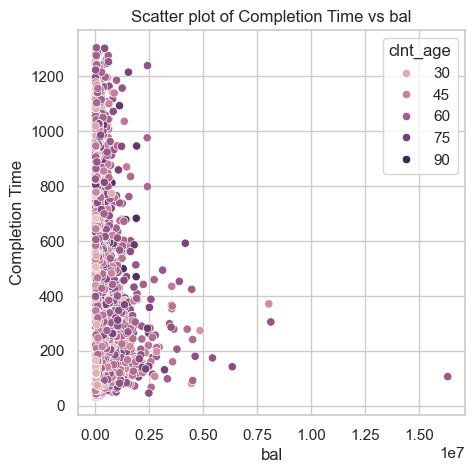

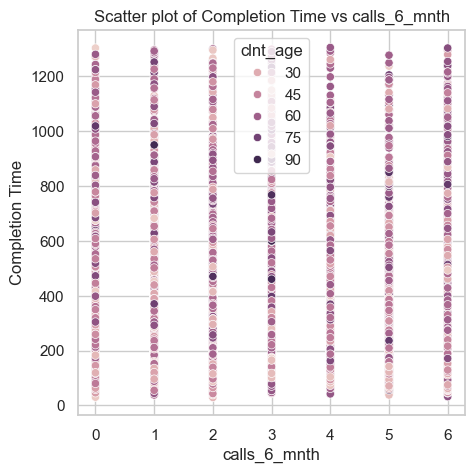

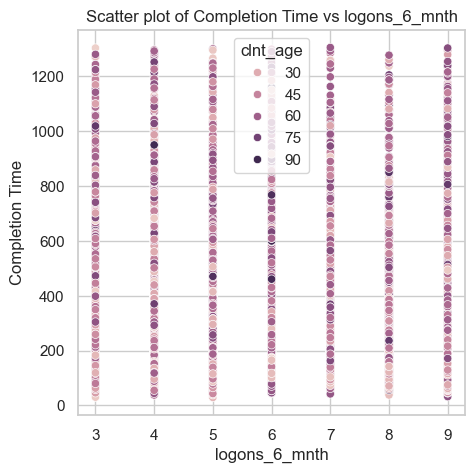

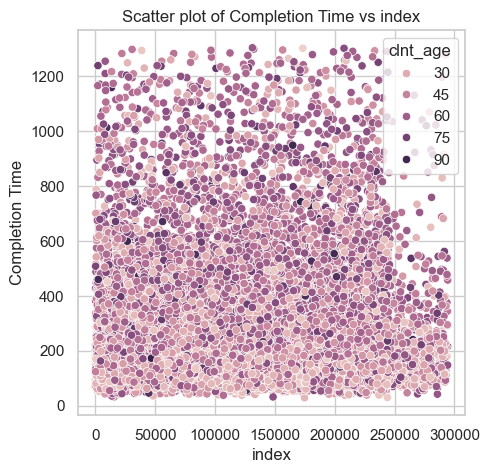

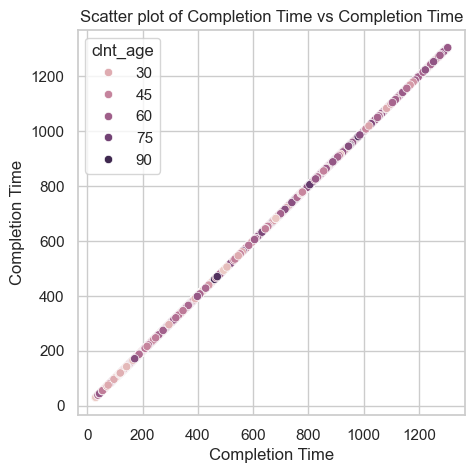

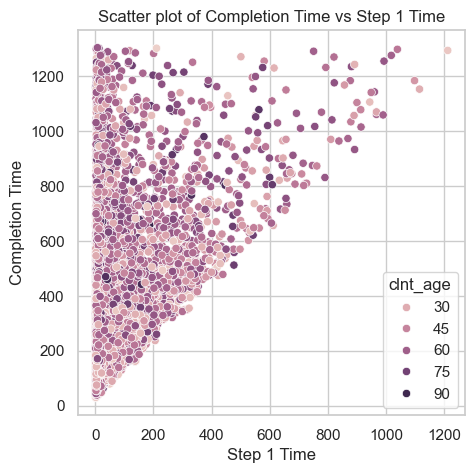

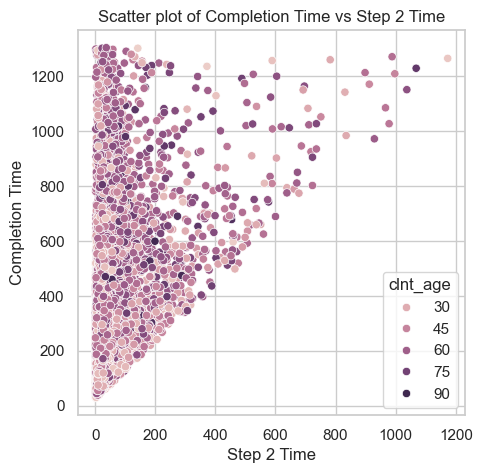

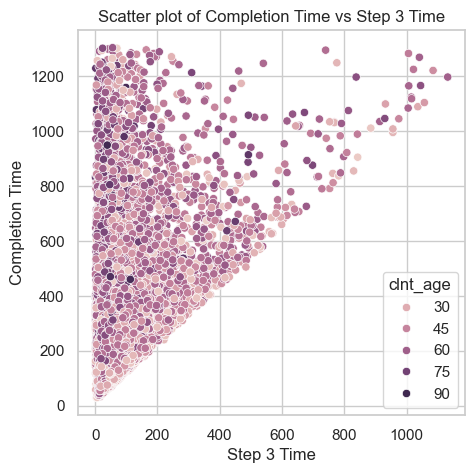

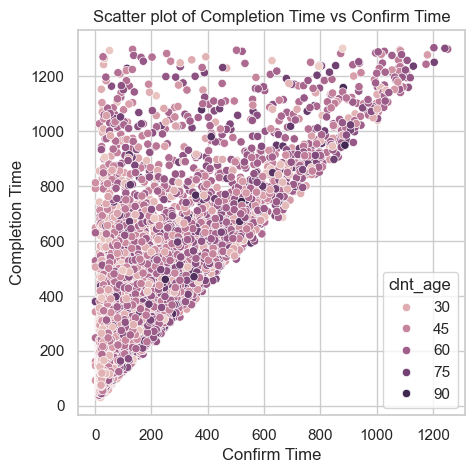

In [312]:
# Plotting scatter plots for each numerical column against 'SalePrice' to visualize their relationships
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Completion Time vs ' + col)
    sns.scatterplot(data=df4[df4['Variation'] == 'Test'], x=col, y='Completion Time', hue = 'clnt_age')
    plt.show()

# Data-driven recommendations

Based on these findings, here are some actionable recommendations for Vanguard:

* Targeted Support for Older Clients: Provide additional support and resources tailored to older clients (aged 55 and above) to help them navigate the online process more effectively. This could include more detailed guides, personalized assistance, or simplified interfaces.
  
* Enhance UI for Long-term Clients: Investigate further the challenges faced by long-term clients (with higher tenure) and clients with larger balances to ensure the new UI can accommodate their needs. Consider developing features that address their specific requirements.

* Leverage Successful Patterns: Continue to leverage the success of the new UI for younger clients and newer clients. Use these segments as benchmarks to further optimize and refine the user experience for other client segments.